- Simple Models (Mean Model, Linear Trend Model, Random Walk Model) , 
- Average and Smoothing Models (Moving Average, Exponential Smoothing) , 
- Linear Regression Models , 
- ARIMA Models.

# Read CSV
- Level(수준): 특정 기간 동안의 평균 값, 시리즈의 성장. 일정 기간 동안의 평균 값 증가 또는 감소, 계절성. 고정된 주기성으로 반복되는 패턴.

In [1]:
df <- read.csv("Departure.csv")
head(df)

,Month,departures..000
,<chr>,<dbl>
1,2010 January,732.4
2,2010 February,757.2
3,2010 March,919.6
4,2010 April,709.5
5,2010 May,977.9
6,2010 June,1183.1


In [2]:
class(df)

[1] "data.frame"

In [3]:
# 시계열 데이터로 변환
departure <- ts(data=df[2], start = c(2010, 1), end = c(2020, 12),
               frequency=12) # 12는 monthly

In [4]:
class(departure)

[1] "ts"

In [5]:
departure

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2010,732.4,757.2,919.6,709.5,977.9,1183.1,1269.5,1250.5,1078.7,1045.8,800.7,700.5
2011,729.6,724.0,869.6,987.9,1084.2,1198.5,1288.0,1247.8,1070.3,978.7,774.3,754.3
2012,700.5,706.9,874.8,972.6,1089.6,1222.3,1278.8,1244.2,1122.1,1041.3,804.1,782.4
2013,709.5,698.7,937.3,972.3,1160.2,1292.1,1336.7,1314.3,1144.2,1079.9,836.5,832.7
2014,764.7,742.8,892.5,1112.7,1223.8,1361.8,1418.4,1403.9,1231.2,1179.9,925.4,912.3
2015,861.5,850.3,1063.4,1178.5,1359.9,1541.7,1600.0,1552.5,1368.8,1339.8,1055.4,1018.6
2016,981.7,989.0,1236.5,1282.8,1475.7,1684.6,1738.7,1688.9,1498.6,1462.3,1134.9,1145.3
2017,1057.1,1020.2,1227.7,1438.7,1530.6,1761.5,1828.6,1778.1,1583.6,1505.9,1203.5,1204.3
2018,1115.6,1047.3,1294.6,1473.8,1687.4,1879.0,1932.0,1865.2,1691.0,1624.9,1284.0,1285.7
2019,1169.3,1139.1,1375.4,1622.6,1744.0,1933.4,2006.9,1967.5,1757.4,1660.1,1279.1,1320.2


In [6]:
departure <- ts(as.numeric(departure), start=c(2010,1), frequency = 12)
departure
str(departure)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2010,732.4,757.2,919.6,709.5,977.9,1183.1,1269.5,1250.5,1078.7,1045.8,800.7,700.5
2011,729.6,724.0,869.6,987.9,1084.2,1198.5,1288.0,1247.8,1070.3,978.7,774.3,754.3
2012,700.5,706.9,874.8,972.6,1089.6,1222.3,1278.8,1244.2,1122.1,1041.3,804.1,782.4
2013,709.5,698.7,937.3,972.3,1160.2,1292.1,1336.7,1314.3,1144.2,1079.9,836.5,832.7
2014,764.7,742.8,892.5,1112.7,1223.8,1361.8,1418.4,1403.9,1231.2,1179.9,925.4,912.3
2015,861.5,850.3,1063.4,1178.5,1359.9,1541.7,1600.0,1552.5,1368.8,1339.8,1055.4,1018.6
2016,981.7,989.0,1236.5,1282.8,1475.7,1684.6,1738.7,1688.9,1498.6,1462.3,1134.9,1145.3
2017,1057.1,1020.2,1227.7,1438.7,1530.6,1761.5,1828.6,1778.1,1583.6,1505.9,1203.5,1204.3
2018,1115.6,1047.3,1294.6,1473.8,1687.4,1879.0,1932.0,1865.2,1691.0,1624.9,1284.0,1285.7
2019,1169.3,1139.1,1375.4,1622.6,1744.0,1933.4,2006.9,1967.5,1757.4,1660.1,1279.1,1320.2


 Time-Series [1:132] from 2010 to 2021: 732 757 920 710 978 ...


In [7]:
str(departure)

 Time-Series [1:132] from 2010 to 2021: 732 757 920 710 978 ...


# Exploratory Time Series Analysis

In [8]:
# # 단순하게 plot으로만으로도 시계열 그래프를 그릴 수 있다.
# plot(departure)

In [9]:
# # 파라미터 지정
# plot(departure, col = "darkgray", lwd=2,
#     xlab="Year", ylab = "Departure Passengers",
#     main = "Departure Passengers from Dublin Airport")
# # 계절마다 등락하는 일정한 패턴을 보이며, 점진적으로 상승하는 추세를 보이지만,
# # Covid19 영향으로 2020, 3월부터 irregullar fluctuations가 보인다.

In [10]:
# # 관측값 간의 시간 간격을 산출
# deltat(departure)
# # frequency() 함수로부터 반환된 값의 역수로 계산 된다.
# 1/12
# # 0.0833333333333333 == 월간 간격을 의미

In [11]:
# time(departure)
# # 0.0833333333333333을 이용해서 계산이 된 결과가 보여진다.
# # July가 정 중앙 지점.

In [12]:
# # 말 그대로 싸이클
# cycle(departure)

In [13]:
# # Quaterly
# window(departure, start = c(2010, 1), frequency = 4)

In [14]:
# # 파라미터 지정
# # Quaterly
# plot(window(departure, start = c(2010, 1), frequency = 4), col = "salmon", lwd=2,
#     xlab="Year", ylab = "Departure Passengers",
#     main = "Departure Passengers from Dublin Airport")
# # 계절마다 등락하는 일정한 패턴을 보이며, 점진적으로 상승하는 추세를 보인다.

In [15]:
library(fpp2)

Warning message:
"package 'fpp2' was built under R version 4.2.2"
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

── Attaching packages ────────────────────────────────────────────────────────────────────────────────────── fpp2 2.4 ──

✔ ggplot2   3.4.0     ✔ fma       2.4  
✔ forecast  8.19      ✔ expsmooth 2.3  

Warning message:
"package 'ggplot2' was built under R version 4.2.2"
Warning message:
"package 'forecast' was built under R version 4.2.2"
Warning message:
"package 'fma' was built under R version 4.2.2"
Warning message:
"package 'expsmooth' was built under R version 4.2.2"



Attaching package: 'fpp2'


The following object is masked _by_ '.GlobalEnv':

    prison




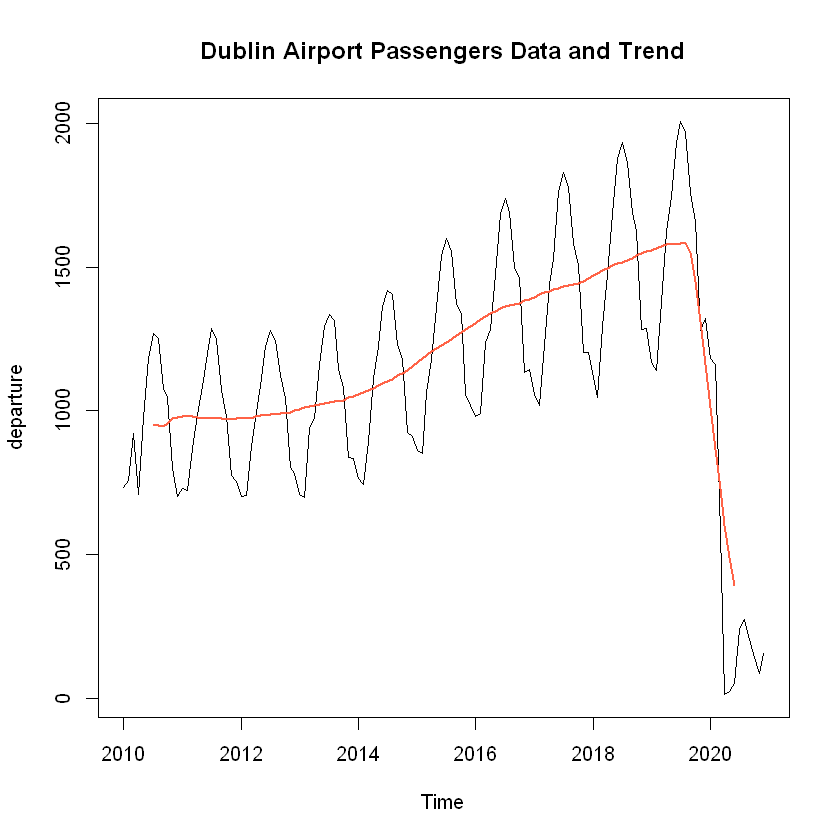

In [16]:
plot(departure, main='Dublin Airport Passengers Data and Trend')
x <- as.vector(time(departure))
y <- ma(departure, order=12)
lines(x, y, col='tomato', lw=2)

# 계절마다 등락하는 일정한 패턴을 보이며, 점진적으로 상승하는 추세를 보이지만,
# Covid19 영향으로 2020, 3월부터 irregullar fluctuations가 보인다.

- ma(): Moving-average smoothing. ma computes a simple moving average smoother of a given time series.
- Details: The moving average smoother averages the nearest order periods of each observation. As neighbouring observations of a time series are likely to be similar in value, averaging eliminates some of the randomness in the data, leaving a smooth trend-cycle component.

## Monthly Range of Production Data

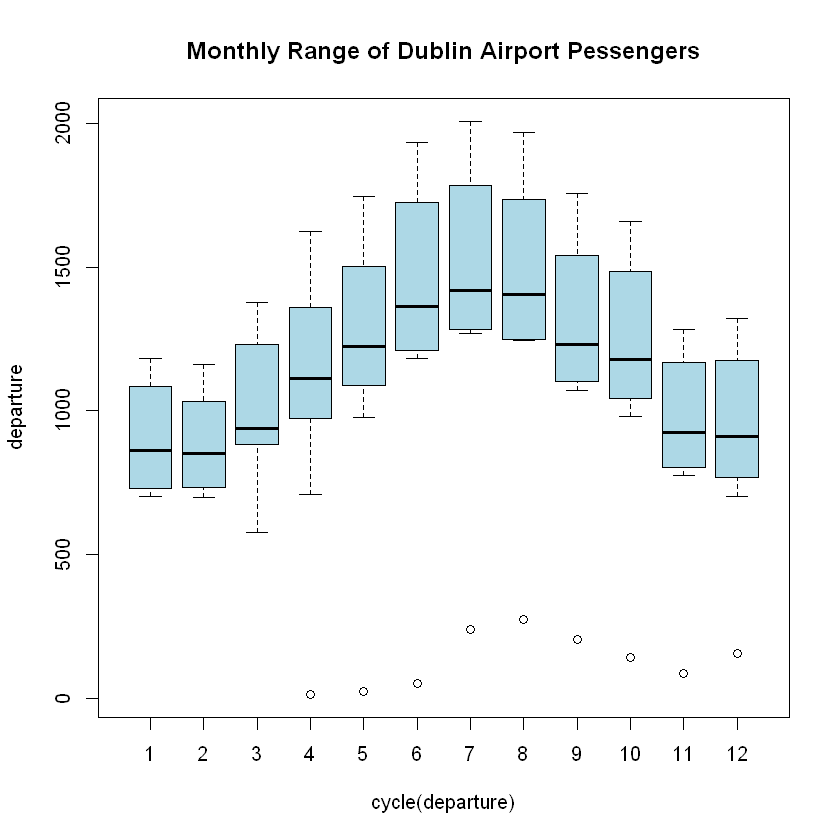

In [17]:
boxplot(departure~cycle(departure), 
            main="Monthly Range of Dublin Airport Pessengers",
            col='lightblue')
# Observed some outliers but it should be impacted by Covid19 since 2020 March.
# since 2020 March를 제외하곤, seasonal ??? 하다고 할 수 있다.

In [18]:
## 위랑 거의 같으니까 패스
# monthplot(departure)

## Yearly Range of Production Data
Note the impact of the covid19 (2020~2021).
두 개의 아웃라이어가 보이나, 2020 Jan, Feb 데이터임.

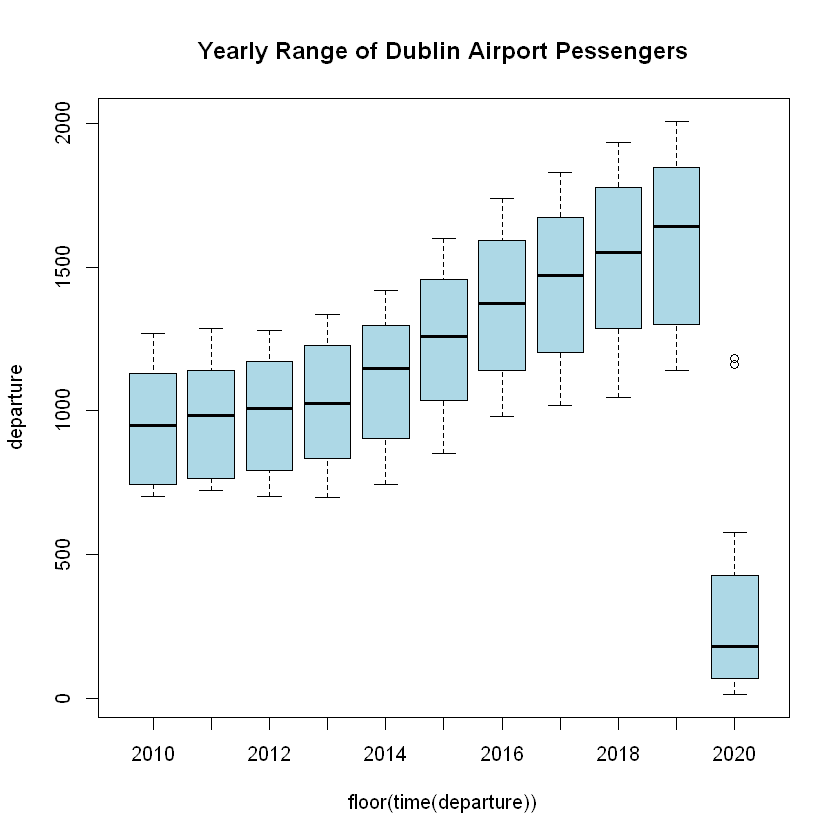

In [19]:
boxplot(departure~floor(time(departure)), 
           main="Yearly Range of Dublin Airport Pessengers",
           col='lightblue')

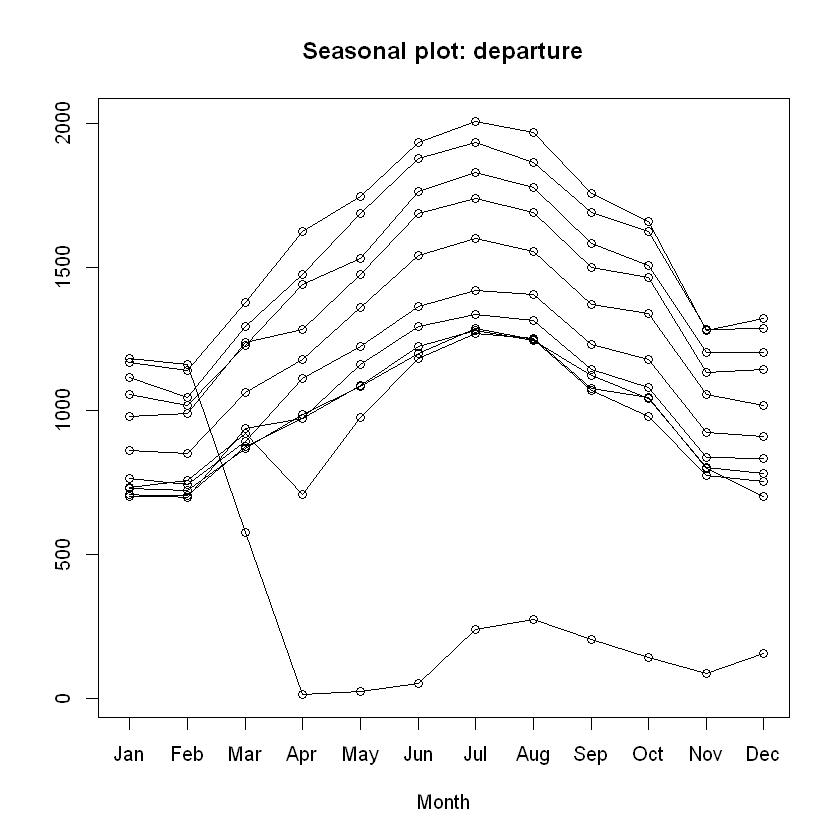

In [20]:
seasonplot(departure)

In [21]:
# ggseasonplot(departure)

In [22]:
# ggseasonplot(departure, polar=TRUE)

# Simple Models

## Regression Models - 레포트에서 빼기

### Linear Model

In [23]:
lm.passengers <- lm(departure~time(departure))

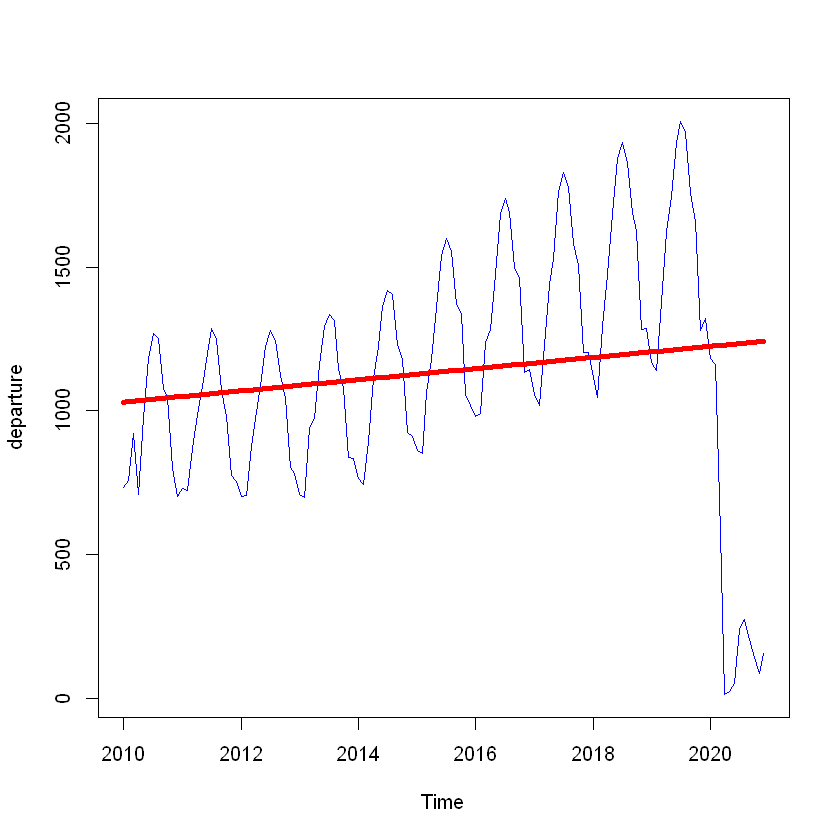

In [24]:
plot(departure, col='blue')
x <- as.vector(time(departure))
y <- predict.lm(lm.passengers)
lines(x, y, col='red', lw=4)

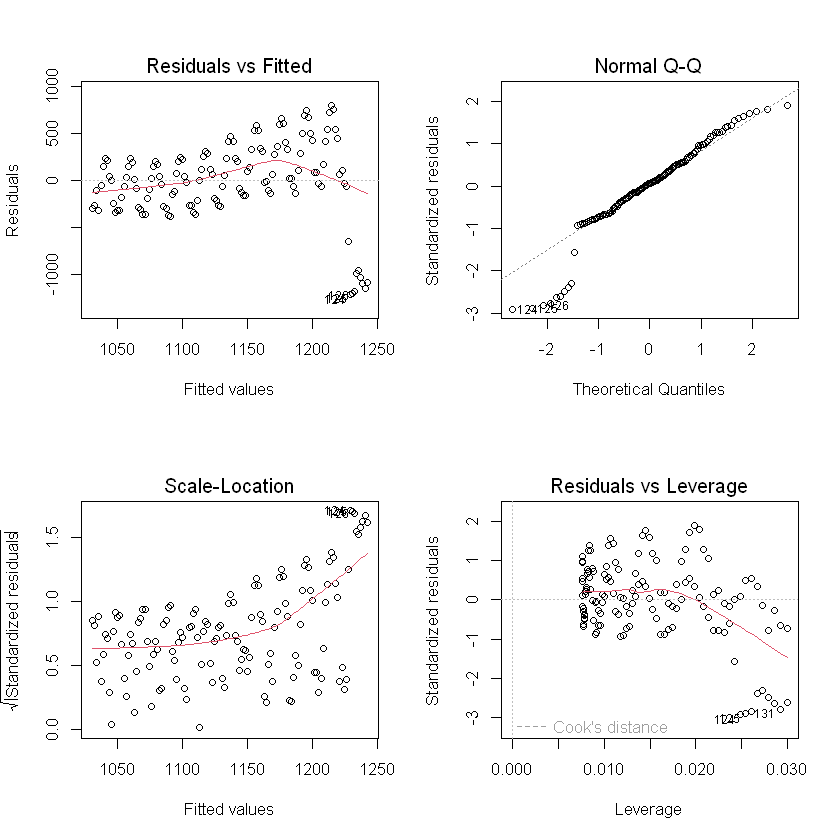

In [25]:
par(mfrow=c(2,2))
plot(lm.passengers)

### Logarithmic Model

In [26]:
log.passengers <- log(departure) 
log.passengers

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2010,6.596327,6.629627,6.823939,6.564560,6.885407,7.075893,7.146378,7.131299,6.983512,6.952537,6.685486,6.551794
2011,6.592496,6.584791,6.768033,6.895581,6.988598,7.088826,7.160846,7.129137,6.975694,6.886225,6.651959,6.625790
2012,6.551794,6.560889,6.773995,6.879973,6.993566,7.108490,7.153677,7.126248,7.022957,6.948225,6.689724,6.662366
2013,6.564560,6.549221,6.843003,6.879664,7.056348,7.164024,7.197959,7.181059,7.042461,6.984624,6.729227,6.724673
2014,6.639484,6.610427,6.794027,7.014545,7.109716,7.216563,7.257285,7.247009,7.115745,7.073185,6.830226,6.815969
2015,6.758675,6.745589,6.969227,7.071998,7.215166,7.340641,7.377759,7.347622,7.221690,7.200276,6.961675,6.926184
2016,6.889286,6.896694,7.120040,7.156800,7.296888,7.429283,7.460893,7.431833,7.312287,7.287766,7.034300,7.043422
2017,6.963285,6.927754,7.112898,7.271495,7.333415,7.473921,7.511306,7.483301,7.367456,7.317146,7.092989,7.093654
2018,7.017148,6.953971,7.165957,7.295599,7.430944,7.538495,7.566311,7.531124,7.433075,7.393202,7.157735,7.159059
2019,7.064161,7.037994,7.226500,7.391785,7.463937,7.567035,7.604347,7.584519,7.471591,7.414633,7.153912,7.185539


In [27]:
log.lm.passengers <- lm(log.passengers~time(departure))
log.lm.passengers


Call:
lm(formula = log.passengers ~ time(departure))

Coefficients:
    (Intercept)  time(departure)  
        89.3078          -0.0409  


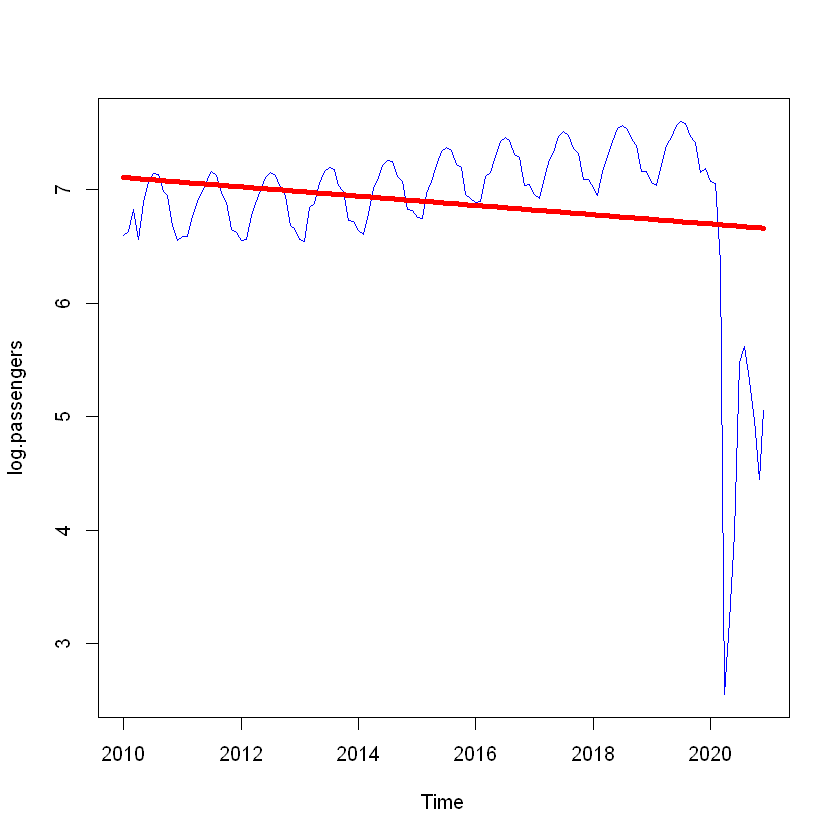

In [28]:
plot(log.passengers, col='blue')
x <- as.vector(time(departure))
y <- predict.lm(log.lm.passengers)
lines(x, y, col='red', lw=4)

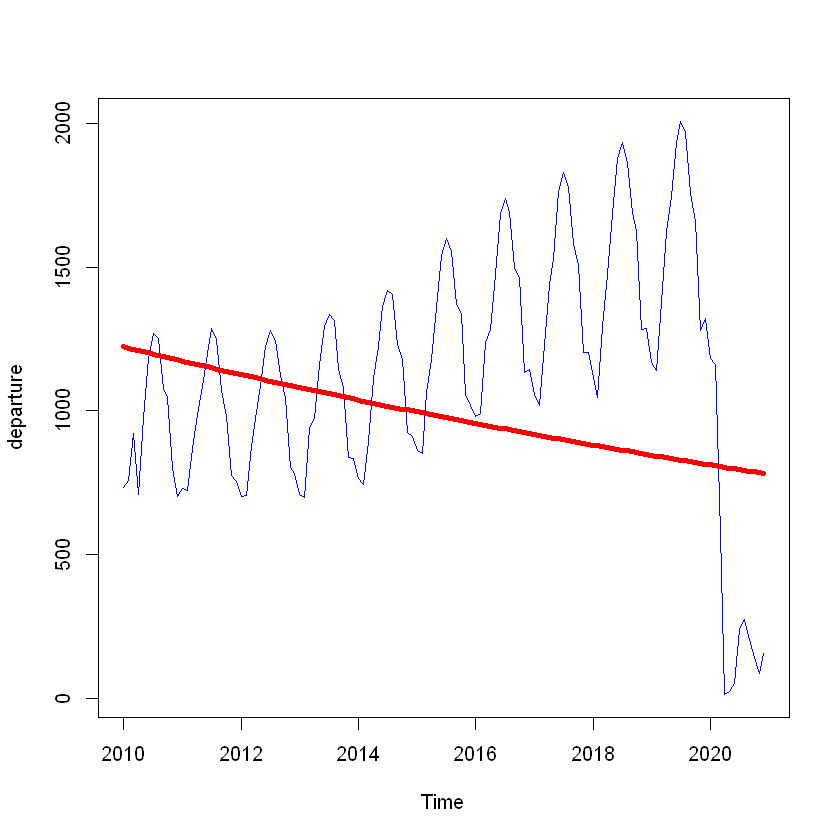

In [29]:
plot(departure, col='blue')
x <- as.vector(time(departure))
y <- exp(predict.lm(log.lm.passengers))
lines(x, y, col='red', lw=4)

# Moving Averages

In [30]:
# install.packages('forecast')
library(forecast)

In [31]:
# plot(departure, col = "dimgray", lwd=2,
#                   ylab="Temperature",
#                   main="Base Time Series")

In [32]:
# 추세 분석 >> 단순 평균 이동을 탐색하는 다양한 함수 중 forecast 패키지 사용>> ma() 함수 사용
library(forecast)

In [33]:
ma(departure, 3) # k가 3일 때의 이동 평균

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2010,NA,803.0667,795.4333,869.0000,956.8333,1143.5000,1234.3667,1199.5667,1125.0000,975.0667,849.0000,743.6000
2011,718.0333,774.4000,860.5000,980.5667,1090.2000,1190.2333,1244.7667,1202.0333,1098.9333,941.1000,835.7667,743.0333
2012,720.5667,760.7333,851.4333,979.0000,1094.8333,1196.9000,1248.4333,1215.0333,1135.8667,989.1667,875.9333,765.3333
2013,730.2000,781.8333,869.4333,1023.2667,1141.5333,1263.0000,1314.3667,1265.0667,1179.4667,1020.2000,916.3667,811.3000
2014,780.0667,800.0000,916.0000,1076.3333,1232.7667,1334.6667,1394.7000,1351.1667,1271.6667,1112.1667,1005.8667,899.7333
2015,874.7000,925.0667,1030.7333,1200.6000,1360.0333,1500.5333,1564.7333,1507.1000,1420.3667,1254.6667,1137.9333,1018.5667
2016,996.4333,1069.0667,1169.4333,1331.6667,1481.0333,1633.0000,1704.0667,1642.0667,1549.9333,1365.2667,1247.5000,1112.4333
2017,1074.2000,1101.6667,1228.8667,1399.0000,1576.9333,1706.9000,1789.4000,1730.1000,1622.5333,1431.0000,1304.5667,1174.4667
2018,1122.4000,1152.5000,1271.9000,1485.2667,1680.0667,1832.8000,1892.0667,1829.4000,1727.0333,1533.3000,1398.2000,1246.3333
2019,1198.0333,1227.9333,1379.0333,1580.6667,1766.6667,1894.7667,1969.2667,1910.6000,1795.0000,1565.5333,1419.8000,1260.9333


In [34]:
ma(departure, 7) # k가 7일 때의 이동 평균

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2010,NA,NA,NA,935.6000,1009.6143,1055.5429,1073.5714,1086.6000,1046.9714,982.1857,904.2571,849.8429
2011,836.8714,842.3571,899.1857,983.1143,1057.1429,1106.6143,1122.2000,1091.6857,1044.5571,973.4143,890.4000,837.1143
2012,823.1571,839.0000,903.0000,977.9286,1055.6000,1114.9143,1138.7000,1114.6286,1070.7429,997.4857,914.6143,870.7714
2013,849.3714,866.3571,936.0714,1015.2571,1101.6571,1165.3000,1185.6714,1166.2714,1119.4857,1044.1429,959.3000,899.0429
2014,894.5429,915.1000,990.1429,1073.8143,1165.1286,1234.9000,1275.9571,1249.2000,1204.7000,1133.2286,1052.0714,1003.4286
2015,995.9000,1021.6143,1109.6571,1207.9000,1306.6143,1380.6857,1420.1714,1402.5857,1353.8286,1273.8286,1186.5429,1141.4000
2016,1129.1143,1148.5286,1238.4143,1341.2857,1442.3143,1515.1143,1547.3714,1526.2429,1479.0429,1389.4000,1286.7571,1220.8714
2017,1212.3143,1222.0714,1311.5857,1409.2000,1512.2000,1592.6857,1632.4286,1598.8286,1552.2143,1459.9429,1348.3286,1279.2571
2018,1263.5714,1289.5000,1386.0000,1489.9571,1597.0429,1689.0000,1736.1857,1709.0714,1651.6857,1550.3000,1437.0286,1367.0571
2019,1357.2857,1374.3000,1467.0714,1570.1000,1684.1286,1772.4571,1813.1286,1764.0571,1703.5143,1596.3857,1475.6714,1276.8286


In [35]:
ma(departure, 11) # k가11일 때의 이동 평균

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2010,NA,NA,NA,NA,NA,974.9909,972.0909,969.5818,951.8000,966.3545,967.2636,958.2727
2011,951.8182,955.2273,970.6000,972.8273,989.0091,995.7182,997.9636,995.8273,981.0364,970.7545,960.6091,950.7091
2012,944.7364,947.5545,963.3636,976.4000,1000.6727,1005.2000,1012.6455,1012.8818,996.8727,993.6636,983.0000,977.3545
2013,978.5636,986.9727,1004.4455,1013.8000,1038.8727,1043.7909,1054.9909,1060.9909,1043.3091,1036.0545,1031.7364,1025.5273
2014,1027.8091,1037.2727,1060.8818,1074.6364,1105.8545,1114.2818,1127.7000,1138.4909,1134.6545,1130.1727,1126.0545,1125.8818
2015,1137.0909,1154.9182,1184.1273,1201.3000,1238.9727,1251.9818,1266.2636,1278.2091,1271.4455,1276.7182,1269.7091,1263.7091
2016,1271.4000,1288.3273,1317.4273,1331.8636,1368.8545,1379.4273,1394.3000,1400.4909,1380.8273,1375.8182,1372.4545,1358.4545
2017,1360.5273,1373.2273,1398.6364,1409.6636,1443.3909,1448.6818,1462.0636,1470.7364,1454.3364,1441.2364,1436.0727,1429.3364
2018,1433.9182,1447.9091,1473.5091,1490.3364,1528.6455,1535.8909,1551.3545,1562.4455,1548.3091,1539.3636,1533.4727,1521.2000
2019,1521.3273,1534.2091,1559.3455,1571.3909,1605.5818,1604.9818,1618.7000,1622.7364,1603.3273,1508.1455,1350.7636,1177.2455


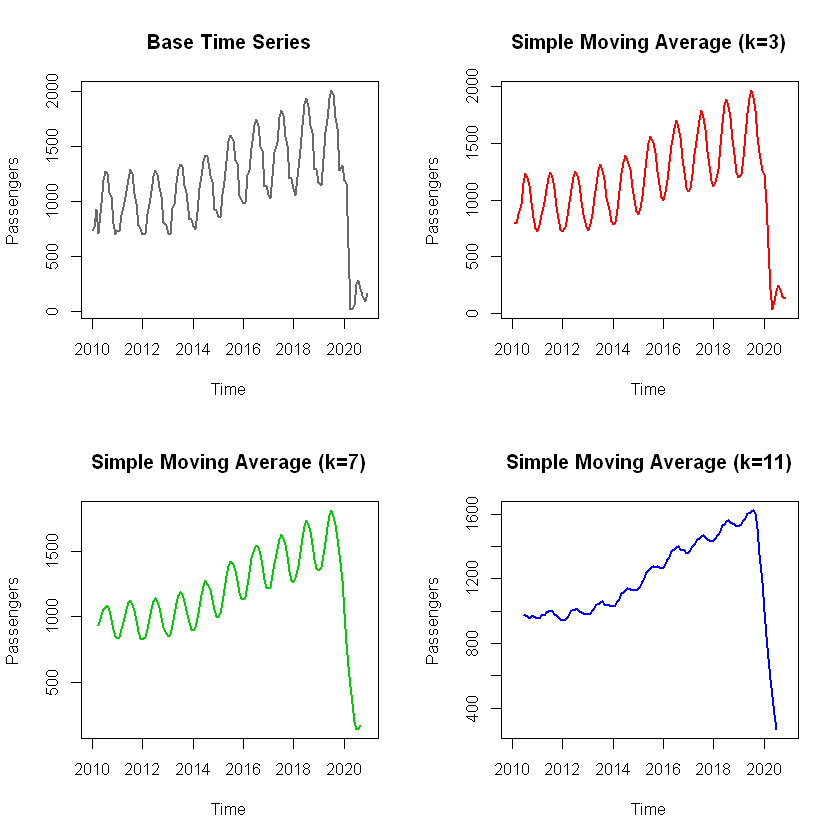

In [36]:
# k값이 변화함에 따라 어떻게 달라지는지 시각적으로 확인하기
par(mfrow = c(2, 2))
plot(departure, col = "dimgray", lwd=2,
                  ylab="Passengers",
                  main="Base Time Series")

plot(ma(departure, 3), col = "red", lwd=2,
                  ylab="Passengers",
                  main="Simple Moving Average (k=3)")

plot(ma(departure, 7), col = "green3", lwd=2,
                  ylab="Passengers",
                  main="Simple Moving Average (k=7)")

plot(ma(departure, 11), col = "blue", lwd=2,
                  ylab="Passengers",
                  main="Simple Moving Average (k=11)")

# k값 변화에 따라, 점점 불규칙 패턴이 사라지고 명확한 추세가 드러난다.

## Moving Averages(air passenger 수업 예제)

An overlay plot shows how the moving average can be used to smooth out the seasonal element:

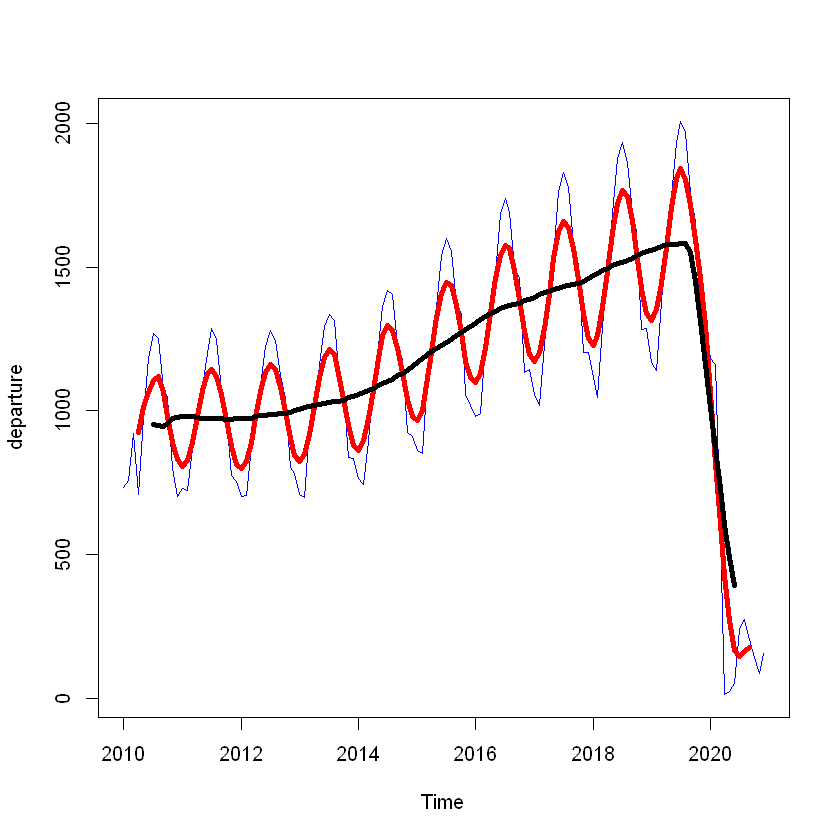

In [37]:
plot(departure, col='blue')
x <- as.vector(time(departure))

y <- ma(departure, order=6)
lines(x, y, col='red', lw=4)
y <- ma(departure, order=12)
lines(x, y, col='black', lw=4)

An overlay of the linear model with the above trendline from the moving averages looks like this:

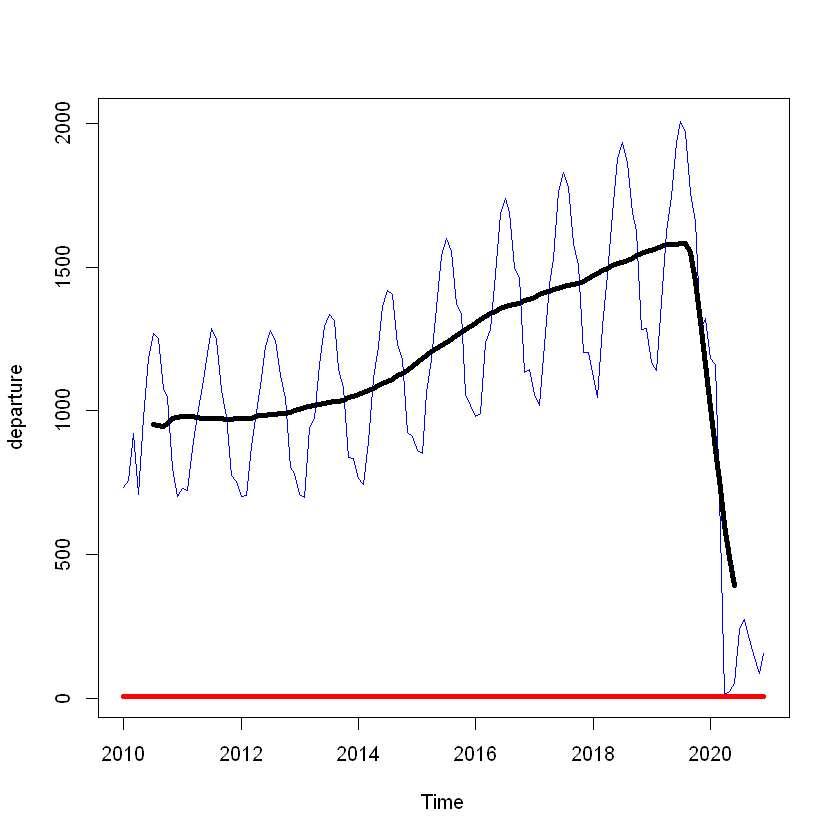

In [38]:
plot(departure, col='blue')
x <- as.vector(time(departure))

y <- predict.lm(log.lm.passengers)
lines(x, y, col='red', lw=4)
y <- ma(departure, order=12)
lines(x, y, col='black', lw=4)

An overlay of the logarithmic model with the above trendline from the moving averages looks like this:

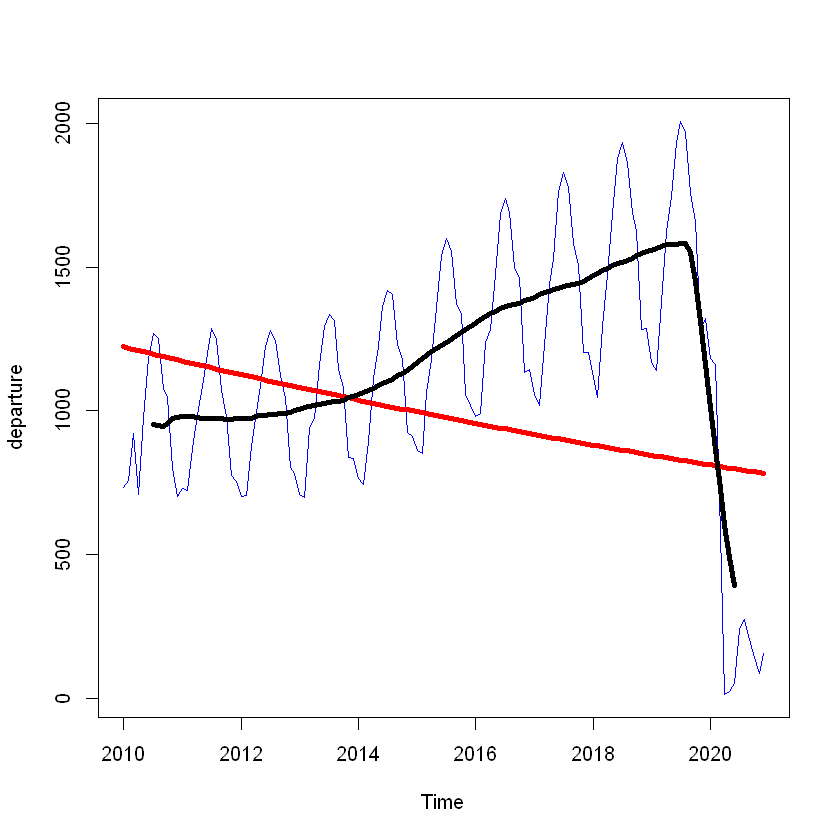

In [39]:
plot(departure, col='blue')
x <- as.vector(time(departure))

y <- exp(predict.lm(log.lm.passengers))
lines(x, y, col='red', lw=4)
y <- ma(departure, order=12)
lines(x, y, col='black', lw=4)

# 시계열 데이터 분해
계절적 요인을 받는 시계열 데이터는, 추세성분 만으로 데이터의 특성을 설명하기에는 부족하다. 추가로 계정 성분을 포함한 분해 과정을 필요로 한다. 월별 데이터나 분기별 데이터와 같이 계절적 요인을 포함한 시계열 데이터는 추세성분과 계절성분, 그리고 불규칙 성분으로 구분할 수 있다.
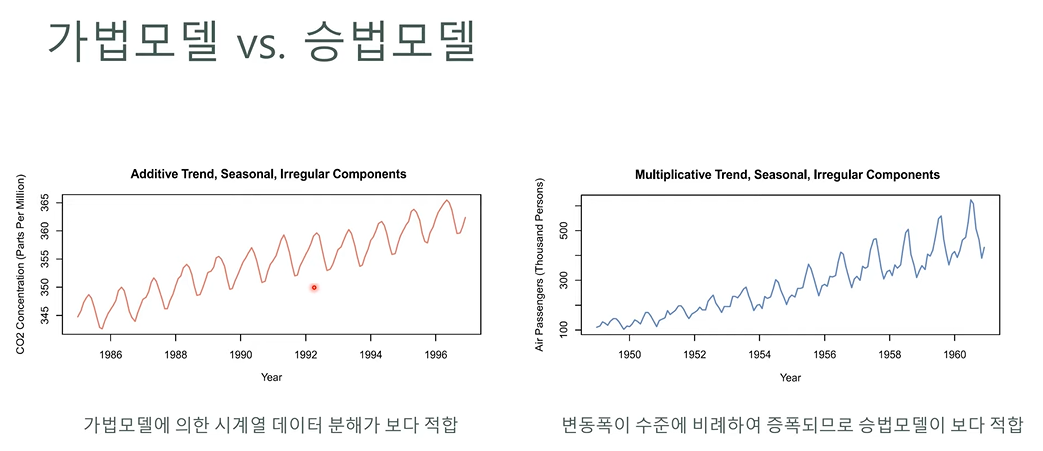
- 추세 성분은 그야말로 트렌드
- 계절 성분: 순환 주기의 영향
- 불규칙 성분: 추세 성분과 계절 성분에 의해 설명되지 않는 영향. 즉, 여기서는 covid19 기간이 해당 될 것.

Decomposition attempts to break down a time series into 

- a trend (over the years), 
- a (yearly) repeating seasonal component, and
- the remaining random (error) component

There are two forms of decomposition: the additive and multiplicative decomposition.

STL: A more robust method — Seasonal and Trend decomposition using Loess (locally estimated scatterplot smoothing). stl()은 시계열 데이터를 trend/seasonality/remainder(irregular fluctuations)으로 분해해준다. 

STL works essentially by first calculating the seasonal component by iteratively averaging the monthly original data and extracting the trend from the difference of original data and the centred seasonal component.

## 가법 모델(Additive Decomposition)
The additive decomposition applies when the seasonal effect and the random error is actually constant in relation to the trend line.

The additive decomposition doesn't quite work out. Note that the random element is of the same order of magnitude as the seasonal component and that the random element behaves towards the beginning counter cyclical and towards the end cyclical.

### stl(): 성분 분해
추세성분과 계절성분, 그리고 불규칙 성분으로 분해해준다.

In [40]:
# s.window: 계절 산출을 위한 기간 범위를 지정해야 한다. 
# 시간의 흐름에 따라 계절적 요인이 얼마나 빠르게 변화하는지를 결정할 수 있다.
# 작은 숫자 지정: 기간 계산 구간이 적어지므로 빠르게 변화하는 패턴을 포착할 수 있고,
# 큰 숫자 지정: 기간 계산 구간이 커지므로 더 느리게 변화하는 패턴을 포착할 수 있다.
# s.window에는 최소 7이상의 숫자를 지정해야 한다.
# departure2 <- ts(as.numeric(departure), start=c(2010,1), frequency = 12)
# str(departure2)
departure.decomp  <- stl(departure, s.window = "periodic") # periodic> 계절 효과가 전 시계열 기간에 걸쳐 모두 동일하게 설정
departure.decomp
# 분석 결과 표가 seasonal(계절), trend(추세), remainder(불규칙 성분) 순서로 나타난다.

 Call:
 stl(x = departure, s.window = "periodic")

Components
           seasonal       trend    remainder
Jan 2010 -262.34252  967.741992   27.0005293
Feb 2010 -270.16005  965.562343   61.7977024
Mar 2010 -132.74102  963.382694   88.9583270
Apr 2010  -84.55878  961.878885 -167.8201067
May 2010   63.31418  960.375075  -45.7892594
Jun 2010  226.79163  959.080258   -2.7718830
Jul 2010  305.94173  957.785441    5.7728331
Aug 2010  283.36027  957.037977   10.1017477
Sep 2010  125.25155  956.290514   -2.8420618
Oct 2010   77.00631  961.308223    7.4854667
Nov 2010 -170.52990  966.325932    4.9039643
Dec 2010 -161.33334  972.174532 -110.3411884
Jan 2011 -262.34252  978.023132   13.9193892
Feb 2011 -270.16005  979.494673   14.6653723
Mar 2011 -132.74102  980.966215   21.3748068
Apr 2011  -84.55878  980.011020   92.4477579
May 2011   63.31418  979.055826   41.8299898
Jun 2011  226.79163  976.603654   -4.8952792
Jul 2011  305.94173  974.151482    7.9067916
Aug 2011  283.36027  971.125292   -6.6

In [41]:
head(departure.decomp$time.series)

,seasonal,trend,remainder
Jan 2010,-262.34252,967.7420,27.000529
Feb 2010,-270.16005,965.5623,61.797702
Mar 2010,-132.74102,963.3827,88.958327
Apr 2010,-84.55878,961.8789,-167.820107
May 2010,63.31418,960.3751,-45.789259
Jun 2010,226.79163,959.0803,-2.771883


In [115]:
p <- forecast(departure.decomp, h=6)
p

         Point Forecast     Lo 80     Hi 80      Lo 95     Hi 95
Jan 2021       109.3611 -18.14339  236.8656  -85.64020  304.3624
Feb 2021       144.9590 -69.98401  359.9019 -183.76794  473.6858
Mar 2021       317.1103  16.97317  617.2474 -141.90982  776.1304
Apr 2021       393.0783   9.63720  776.5195 -193.34428  979.5010
May 2021       563.1800  98.80289 1027.5571 -147.02350 1273.3834
Jun 2021       744.4404 201.86544 1287.0153  -85.35637 1574.2371

In [126]:
df$departures..000[133:138]
p$mean[1:6]

[1] 104.1  46.7  57.5  61.5  82.4 174.7

[1] 109.3611 144.9590 317.1103 393.0783 563.1800 744.4404

In [125]:
diff_table <- data.frame(actual= df$departures..000[133:138], predicted=p$mean[1:6])
mape <- mean(abs(diff_table$actual - diff_table$predicted) / diff_table$actual)
accuracy <- (1-mape)*100
accuracy

accuracy(forecast.arima)

[1] -252.617

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-4.243693,100.1111,50.25274,-18.05207,35.48415,0.260513,-0.002229607


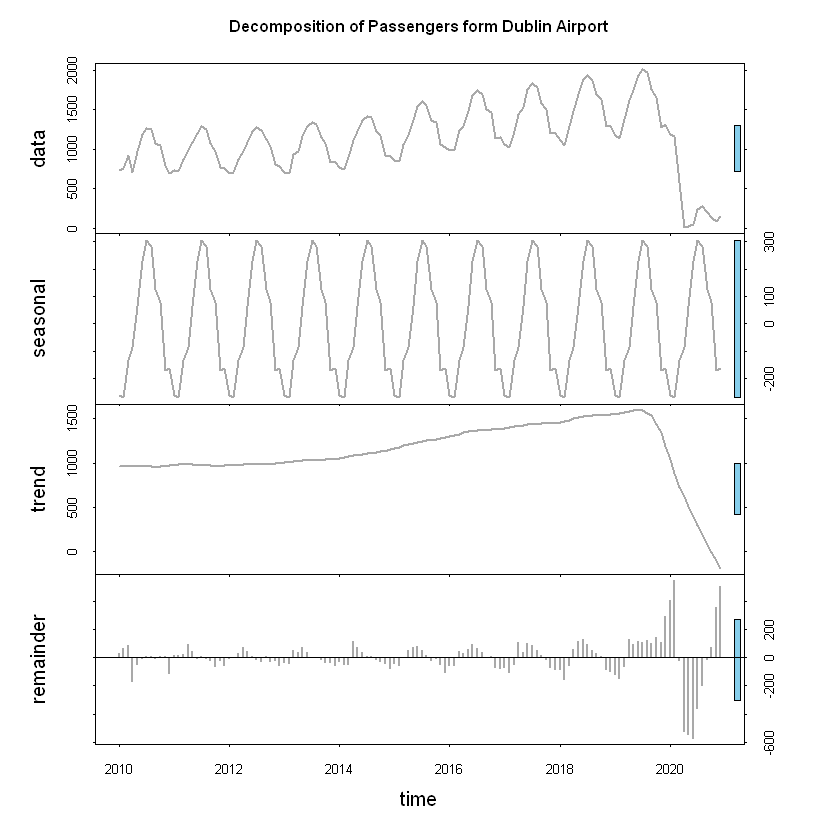

In [42]:
# 표로 그려보기
plot(departure.decomp, col="darkgray", col.range = "skyblue",
    lwd=2, main="Decomposition of Passengers form Dublin Airport")
# seasonal: 위에서 period로 설정 했기 때문에 계절 특성은 매년 동일하다. 4-5에 농도가 높고, 9-10월에 농도가 높다고 보임
# trend: 점진적 상승 패턴
# remainder: 우측 막대기를 통해 remainder의 변동 폭이 가장 작다는 것을 알 수 있다.

In [43]:
# # 위랑 똑같은 플랏
# fit.add <- decompose(departure, type='additive')
# plot(fit.add)

In [44]:
# 첫 번째 행을 전부 더하면
-255.24955+962.3198+25.32975
departure[1]
# 시계열 데이터의 첫 번째 관측값과 같다는 것을 알 수 있다.

[1] 732.4

[1] 732.4

### 계절 영향을 제거한 시계열 데이터

In [45]:
# departure

In [46]:
departure.adj <- departure - departure.decomp$time.series[, "seasonal"]
departure.adj

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2010,994.742521,1027.360046,1052.341021,794.058778,914.585815,956.308375,963.558274,967.139725,953.448452,968.793690,971.229897,861.833344
2011,991.942521,994.160046,1002.341021,1072.458778,1020.885815,971.708375,982.058274,964.439725,945.048452,901.693690,944.829897,915.633344
2012,962.842521,977.060046,1007.541021,1057.158778,1026.285815,995.508375,972.858274,960.839725,996.848452,964.293690,974.629897,943.733344
2013,971.842521,968.860046,1070.041021,1056.858778,1096.885815,1065.308375,1030.758274,1030.939725,1018.948452,1002.893690,1007.029897,994.033344
2014,1027.042521,1012.960046,1025.241021,1197.258778,1160.485815,1135.008375,1112.458274,1120.539725,1105.948452,1102.893690,1095.929897,1073.633344
2015,1123.842521,1120.460046,1196.141021,1263.058778,1296.585815,1314.908375,1294.058274,1269.139725,1243.548452,1262.793690,1225.929897,1179.933344
2016,1244.042521,1259.160046,1369.241021,1367.358778,1412.385815,1457.808375,1432.758274,1405.539725,1373.348452,1385.293690,1305.429897,1306.633344
2017,1319.442521,1290.360046,1360.441021,1523.258778,1467.285815,1534.708375,1522.658274,1494.739725,1458.348452,1428.893690,1374.029897,1365.633344
2018,1377.942521,1317.460046,1427.341021,1558.358778,1624.085815,1652.208375,1626.058274,1581.839725,1565.748452,1547.893690,1454.529897,1447.033344
2019,1431.642521,1409.260046,1508.141021,1707.158778,1680.685815,1706.608375,1700.958274,1684.139725,1632.148452,1583.093690,1449.629897,1481.533344


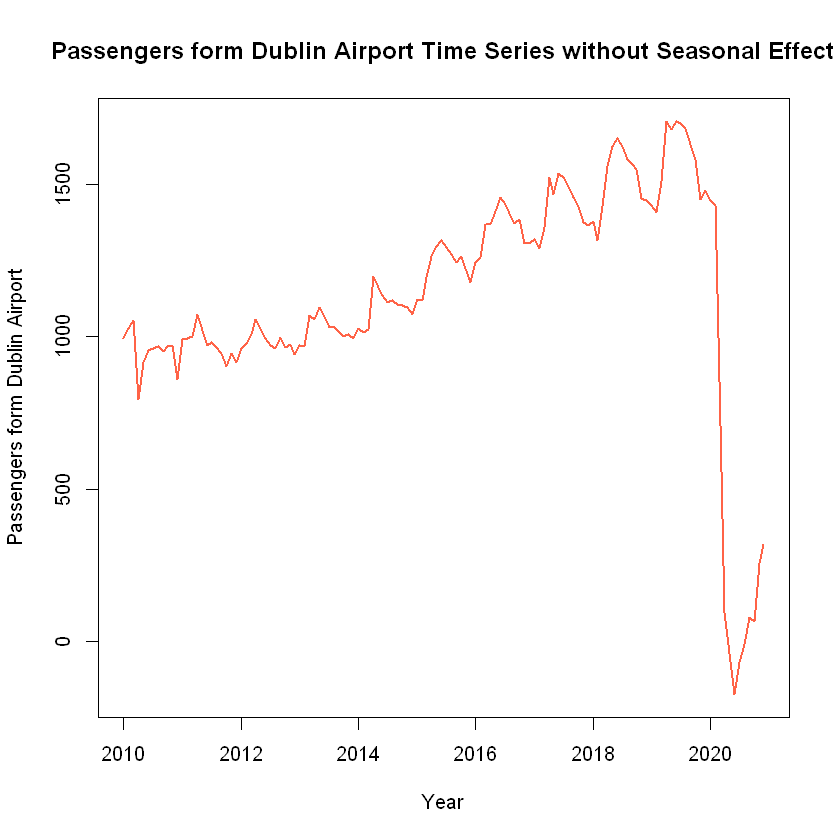

In [47]:
plot(departure.adj, col="tomato", lwd=2,
    xlab="Year", ylab="Passengers form Dublin Airport",
    main="Passengers form Dublin Airport Time Series without Seasonal Effect")
# 흠.... 계절성을 제외 했는데도 계절성 특징을 보이고 있다. 이건 20년 자료 때문일지도 모르겠다....

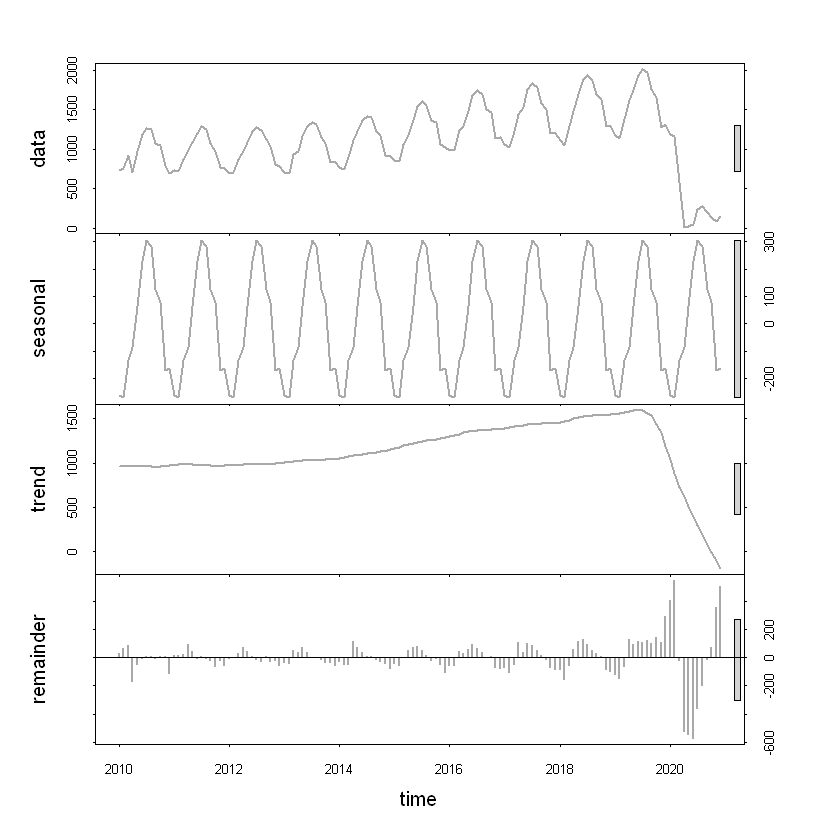

In [48]:
plot(departure.decomp, lwd=2, col="darkgray")

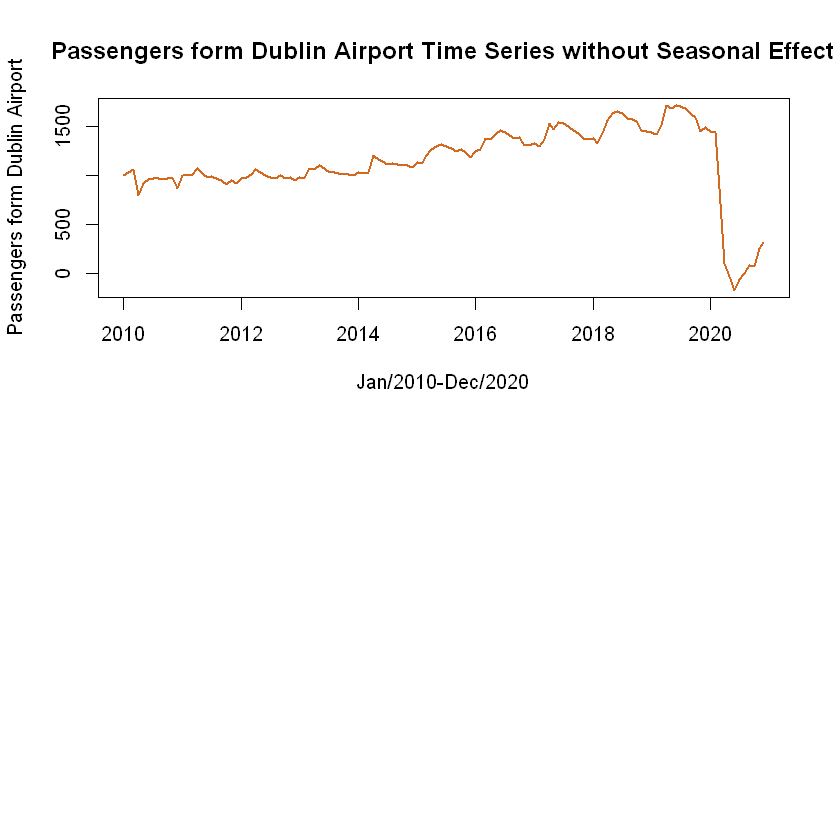

In [49]:
par(mfrow = c(2, 1))

plot(departure.adj, col="chocolate", lwd=2,
    xlab="Jan/2010-Dec/2020", ylab="Passengers form Dublin Airport",
    main="Passengers form Dublin Airport Time Series without Seasonal Effect")
# 흠.... 계절성을 제외 했는데도 불규칙성이 보이고 있다. 


19년 까지 데이터만 확인 해봐도, 계절성 요인 제거 후에도 여전히 불규칙적인 요소가 있는 것을 알 수 있다.(트렌드 제외)

### 월별 시계열 - 계절성만 확인

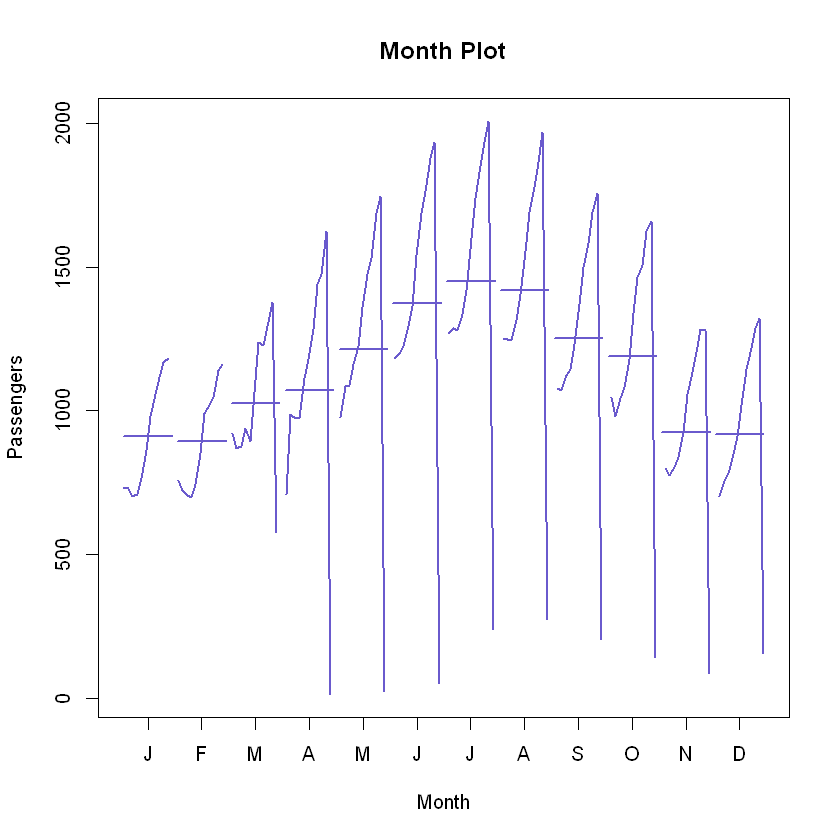

In [50]:
monthplot(departure, col="slateblue", lwd=2,
                xlab="Month", ylab="Passengers",
                main="Month Plot")
# 12의 시계열

### 연도별 시계열

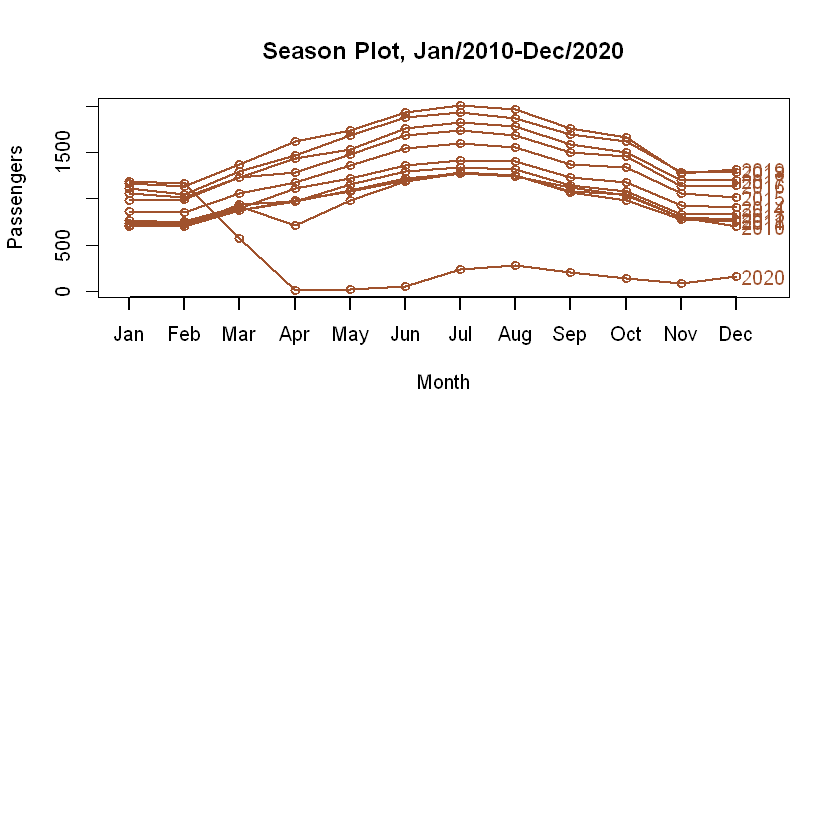

In [51]:
par(mfrow = c(2, 1))
seasonplot(departure, col="sienna", lwd=2, year.labels = TRUE,
                xlab="Month", ylab="Passengers",
                main="Season Plot, Jan/2010-Dec/2020")
# 코비드 초기 영향 받음
# 코비드 전까지는 뚜렷한 계절성이 보임
# 월별과 연도별 시계열에서 모두, 6-8월에는 승객이 많고 높고 11-2월에 농도가 낮다는걸 볼 수 있다.
# 1월부터 점진적 상승 추세, 8월 이후로 점진적 하강 추세를 보인다.

In [52]:
# seasonplot(departure2, col="sienna", lwd=2, year.labels = TRUE,
#                 xlab="Month", ylab="Passengers",
#                 main="Season Plot, Jan/2010-Sep/2022")
# # 월별과 연도별 시계열에서 모두, 6-8월에는 승객이 많고 높고 11-2월에 농도가 낮다는걸 볼 수 있다.
# # 1월부터 점진적 상승 추세, 8월 이후로 점진적 하강 추세를 보인다.

In [53]:
# seasonplot(departure3, col="sienna", lwd=2, year.labels = TRUE,
#                 xlab="Month", ylab="Passengers",
#                 main="Season Plot, Jan/2010-Feb/2020")
# # 월별과 연도별 시계열에서 모두, 6-8월에는 승객이 많고 높고 11-2월에 농도가 낮다는걸 볼 수 있다.
# # 1월부터 점진적 상승 추세, 8월 이후로 점진적 하강 추세를 보인다.

## 승법 모델(Multiplicative Decomposition)
현재 데이터셋에는 맞지 않을 수 있으나 한번 해보도록 하자.

### 로그 변환 성분 분해

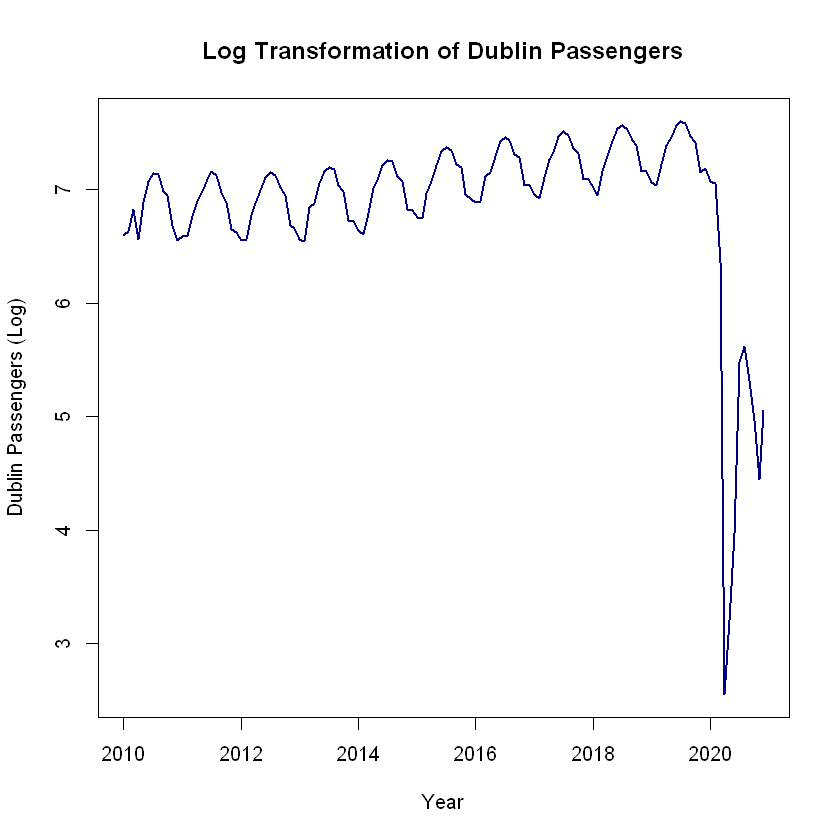

In [54]:
log.passenger <- log(departure)
plot(log.passenger, col="navy", lwd=2,
    xlab="Year", ylab="Dublin Passengers (Log)",
    main="Log Transformation of Dublin Passengers")
# 로그를 씌우니까, 변동폭이 거의 사라짐.

In [55]:
log.passenger.decomp <- stl(log.passenger, s.window = "periodic")

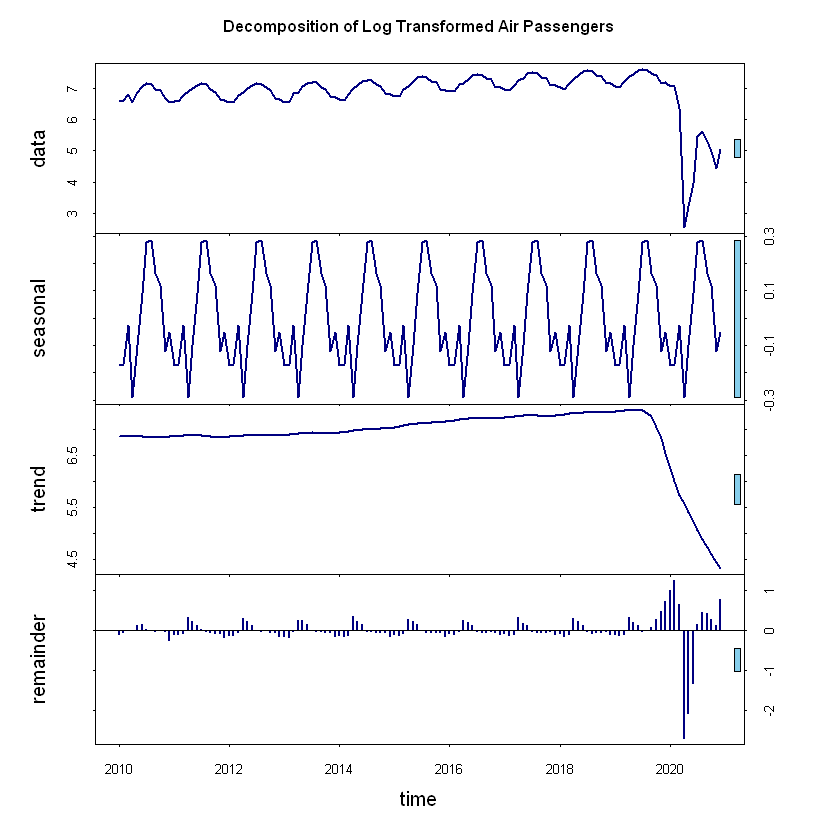

In [56]:
# 성분분해 그래프 그리기
plot(log.passenger.decomp, col="navy", col.range="skyblue",
     lwd=2, main="Decomposition of Log Transformed Air Passengers") 
# seasonal: 여름 성수기에 탑승객이 많은 계절 효과가 보임
# trend: 상승 트렌드
# remainder: 

In [57]:
# 성분 분해 결과를 구체적으로 확인해보자,
log.passenger.decomp$time.series

,seasonal,trend,remainder
Jan 2010,-0.17206658,6.864149,-0.095755954
Feb 2010,-0.17082763,6.861151,-0.060696325
Mar 2010,-0.02804864,6.858153,-0.006165970
Apr 2010,-0.29114539,6.854320,0.001386013
May 2010,-0.10052266,6.850486,0.135443737
Jun 2010,0.09064656,6.847268,0.137978718
Jul 2010,0.27666248,6.844050,0.025666030
Aug 2010,0.28622758,6.842033,0.003038095
Sep 2010,0.16414562,6.840016,-0.020649983
Oct 2010,0.11946585,6.839822,-0.006750059


In [58]:
# 지수 함수를 적용해서 원래 값으로 되돌려야 한다.
exp(log.passenger.decomp$time.series)
# seasonal 결과 해석: 0.8263324/0.7880265 4% 감소했다는 것을 의미, 0.7880265/0.9117982 12% 증가했다는 것을 의미.

,seasonal,trend,remainder
Jan 2010,0.8419231,957.33114,0.90868575
Feb 2010,0.8429669,954.46539,0.94110899
Mar 2010,0.9723411,951.60821,0.99385300
Apr 2010,0.7474070,947.96717,1.00138697
May 2010,0.9043646,944.34007,1.14504477
Jun 2010,1.0948820,941.30585,1.14795112
Jul 2010,1.3187212,938.28139,1.02599824
Aug 2010,1.3313954,936.39095,1.00304271
Sep 2010,1.1783859,934.50433,0.97956177
Oct 2010,1.1268948,934.32247,0.99327267


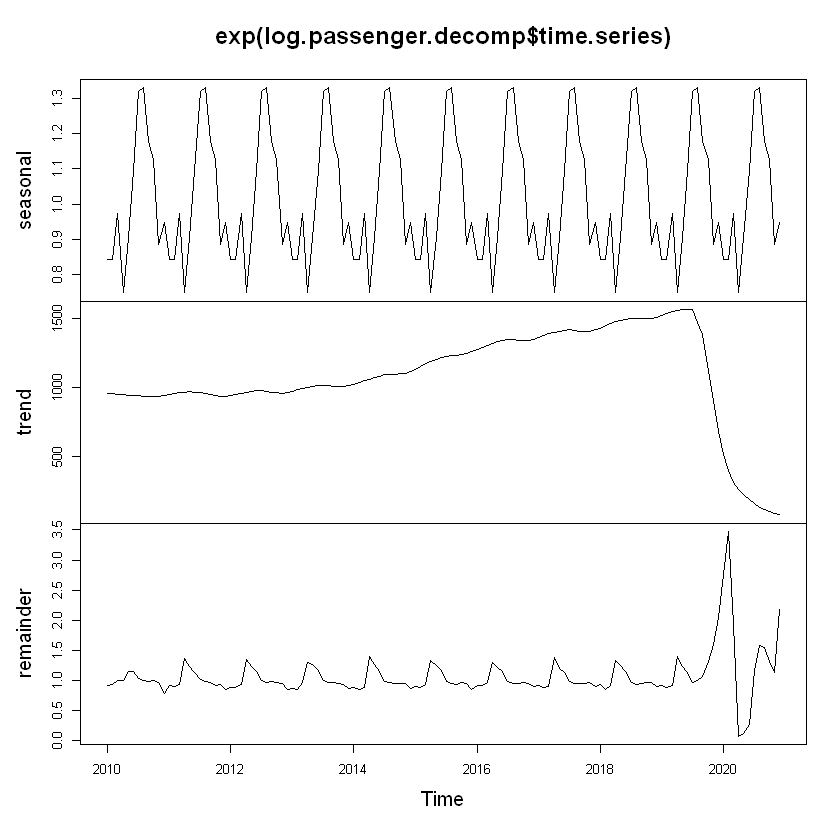

In [59]:
plot(exp(log.passenger.decomp$time.series))

### 로그 없이 STL Decomposition

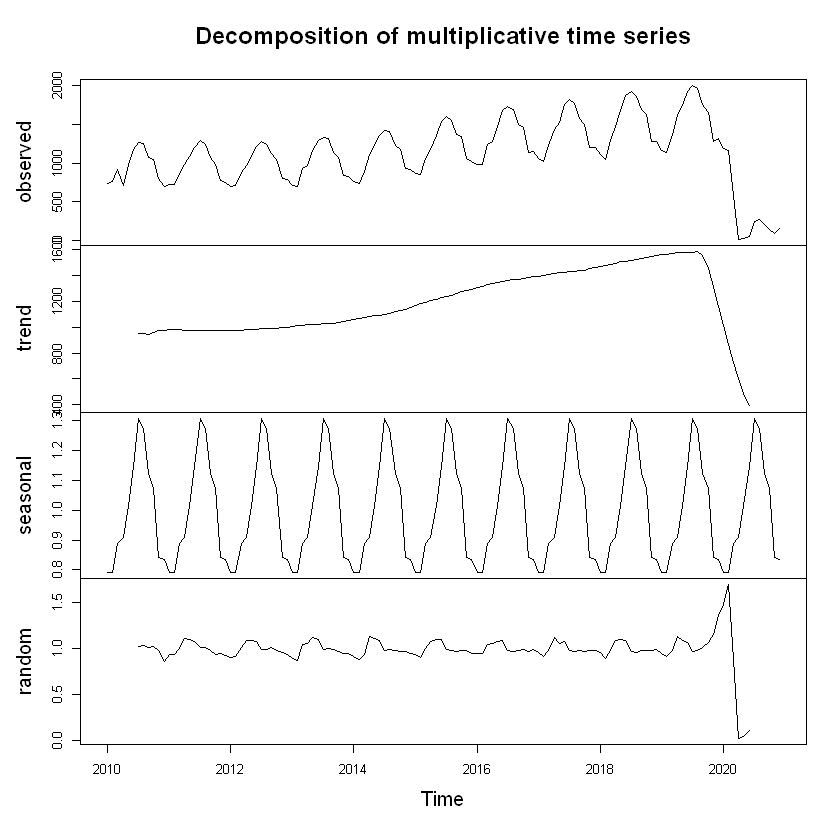

In [60]:
fit.mult <- decompose(departure, type='multiplicative')
plot(fit.mult)

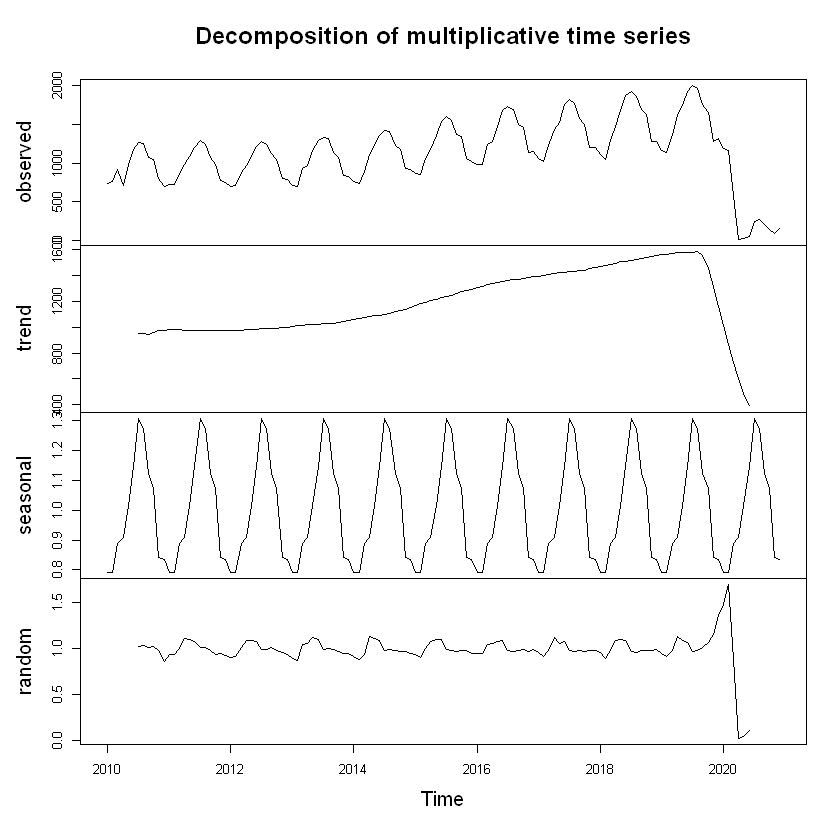

In [61]:
fit.mult <- decompose(departure, type='multiplicative')
plot(fit.mult)

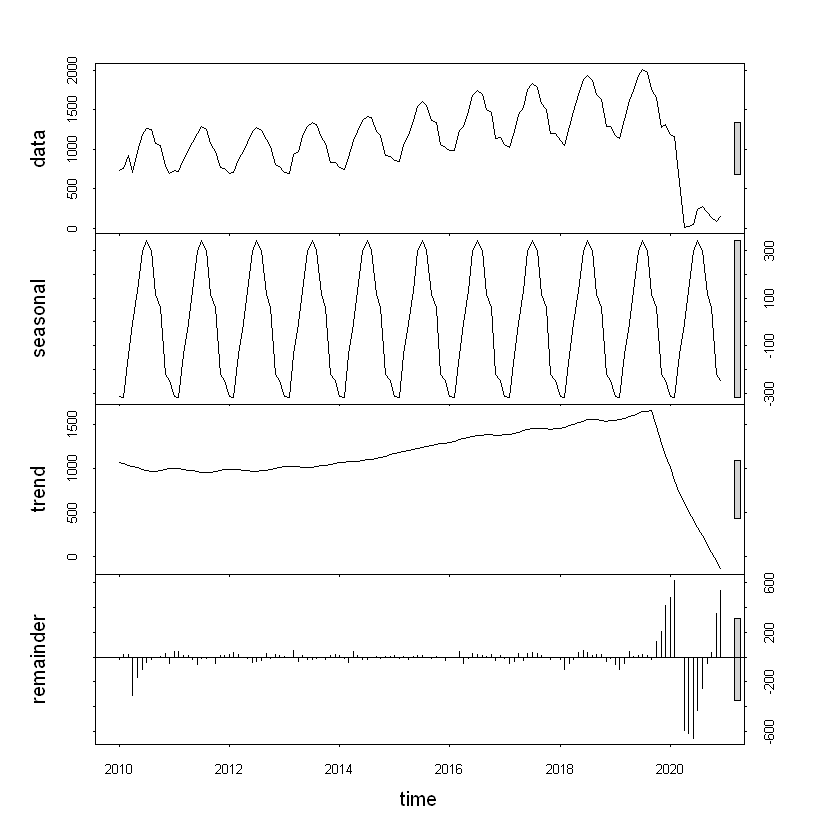

In [62]:
fit.stl <- stl(departure, 
               t.window=13, s.window="periodic", robust=TRUE)
plot(fit.stl)

### X11 Decomposition

Warning message:
"package 'seasonal' was built under R version 4.2.2"


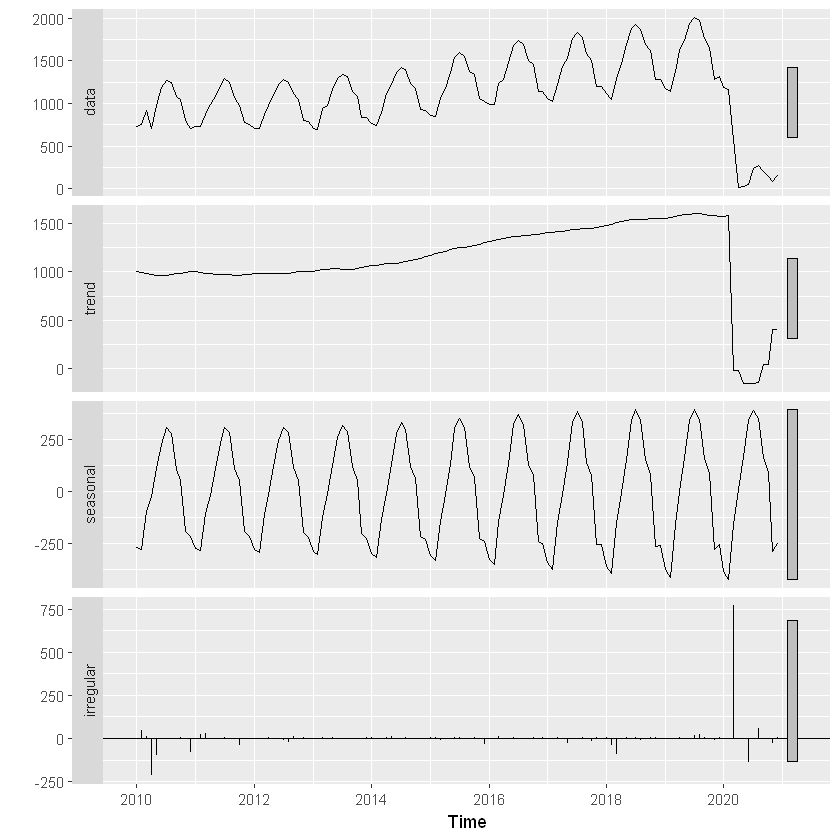

In [63]:
# install.packages('seasonal')
library(seasonal)
fit.X11 <- seas(departure,transform.function="none",x11="")
# This produces a normal (additive) decomposition.
autoplot(fit.X11)

In [64]:
fit.X11Auto <- seas(departure, transform.function="auto",x11="")
# This applies automatically a log transformation, and hence calculates a multiplicative decomposition.
# Note that the crash in 2009 is much steeper.

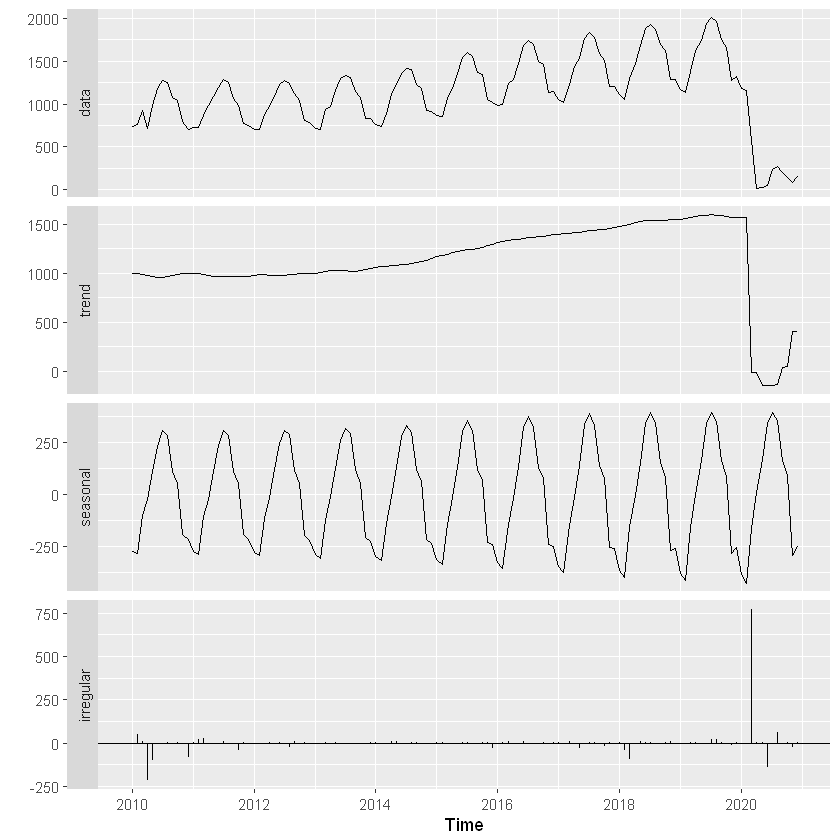

In [65]:
autoplot(fit.X11Auto)

# Exponential forecasting model(지수 예측 모델)

Exponential forecasting model은 단순하면서도 비교적 우수한 단기예측 성능을 보인다.

1. simple exponential smoothing: 예측모델을 생성할 때 불규칙성만 고려되고, 추세와 계절요인은 포함되지 않는다.
2. Holt exponential smoothing: 추세를 갖는 시계열 예측모델을 생성한다.
3. Holt-Winters exponential smoothing: 수준, 기울기, 계절요인이 모두 포함된 예측 모델을 생성한다.
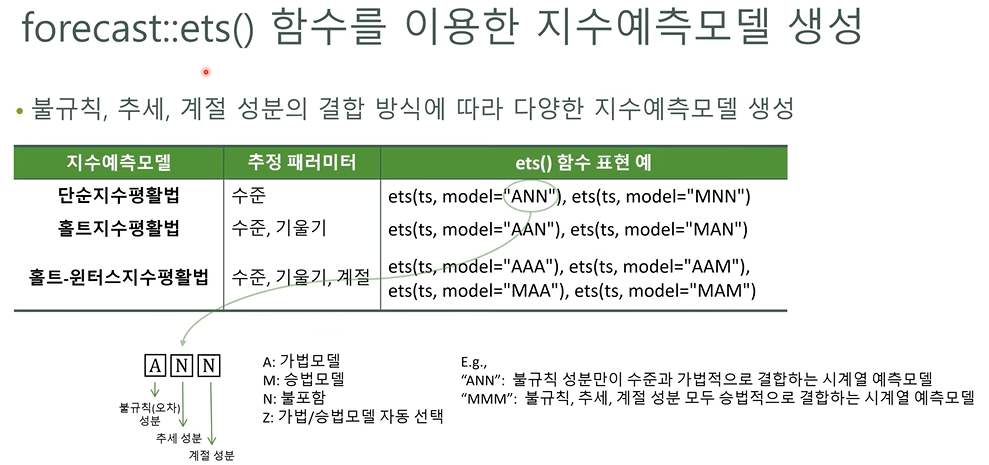

## 단순 지수 평활법 예측 모델
- 추세나 계절적 요인이 없을 경우 사용
- 오로지 수준과 불규칙적인 오차에 의해 관측값이 결정 됨.
- 관측값의 가중평균을 이용하여 예측값 추정
- 관측값이 평균에 미치는 영향이 시간의 흐름에 다라 지수적으로 감소하는 방식으로 가중치 선택
- t+1 시점에서 예측값은 과거 모든 관측값의 가중 평균에 의해 계산

In [66]:
# # library(forecast)
# plot(departure2, col="navy", lwd=2,
#     xlab="Year", ylab="Passengers",
#     main="Air Passengers from Dublin Airport")
# # 눈에 띄는 상승 추세나 하락 추세는 관찰되지 않음 >> 관찰 됨
# # 연도별 데이터이므로 계절적 요인 또한 존재하지 않음 >> 월별 데이터임. 존재 함.
# # 수준과 불규칙 요인만 반영된 단순 지수 평활법을 이용한 시계열 분석이 우선 고려할 수 있는 예측 방법이다.

### ets 모델 생성

In [67]:
simple.ets <- ets(departure, model = "ANN")
simple.ets
# Smoothing parameters: alpha = 0.9999 알파값이 1에 근사하여 매우 크다는 것은, 
# 최근의 관측값이 예측시 가장 우선적으로 고려된다는 것을 의미한다.
# 알파값은 예측 모델의 성능이 최대화 되도록 ets 함수에 의해 자동으로 선택된다.

ETS(A,N,N) 

Call:
 ets(y = departure, model = "ANN") 

  Smoothing parameters:
    alpha = 0.9999 

  Initial states:
    l = 762.1383 

  sigma:  160.1681

     AIC     AICc      BIC 
1988.638 1988.825 1997.286 

### 예측값 추정

In [68]:
simple.ets.pred <- forecast(simple.ets, h=6) # h >> 예측 기간을 지정. 
simple.ets.pred # 예측값: 1592.216, 
# 80% 신뢰구간(1386.9, 1797.5), 95% 신뢰구간(1278.2, 1906.1)

         Point Forecast      Lo 80    Hi 80     Lo 95    Hi 95
Jan 2021       156.0929  -49.17073 361.3565 -157.8307 470.0165
Feb 2021       156.0929 -134.17916 446.3649 -287.8399 600.0257
Mar 2021       156.0929 -199.41037 511.5961 -387.6024 699.7882
Apr 2021       156.0929 -254.40349 566.5893 -471.7071 783.8929
May 2021       156.0929 -302.85371 615.0395 -545.8054 857.9911
Jun 2021       156.0929 -346.65624 658.8420 -612.7956 924.9813

In [69]:
# plot(simple.ets.pred)

Warning message in plot.window(xlim, ylim, log, ...):
""xalb" is not a graphical parameter"
Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
""xalb" is not a graphical parameter"
Warning message in axis(1, ...):
""xalb" is not a graphical parameter"
Warning message in axis(2, ...):
""xalb" is not a graphical parameter"
Warning message in box(...):
""xalb" is not a graphical parameter"


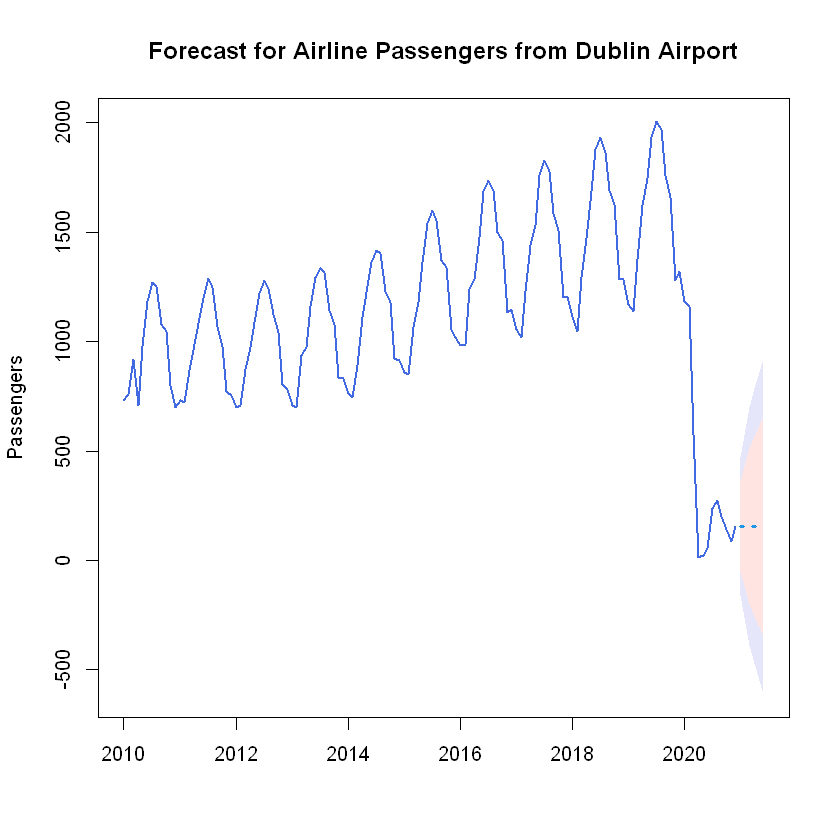

In [70]:
# 예측결과 그래프로 그리기
plot(simple.ets.pred, col="royalblue", lwd=2,
     flty=3, flwd=3, # 예측선의 유형과 두께를 지정
     shadecols=c("lavender", "mistyrose"), # 80과 95% 신뢰구간의 색상
     xalb="Year", ylab="Passengers",
     main="Forecast for Airline Passengers from Dublin Airport")

In [71]:
accuracy(simple.ets)
# RMSE가 가장 널리 사용되지만 아래 지표들을 모두 고려해야 한다.
# 모든 방식은 예측 오차 == 잔차 (관측값과 예측값의 차이)를 기반으로 계산된다.
# ME(Mean Error) 
# RMSE(Root Mean Square Error)
# MAE(Mean Absolute Error) 
# MPE (Mean Percentage Error)
# MAPE (Mean Absolute Percentage Error)
# MASE(Mean Absolute Scaled Error) 
# ACF1(Autocorrelation of errors at lag 1.): 잔차간의 자기 상관. 
# 예측 모델이 적절하여 더이상 개선의 여지가 없다면 잔차간 상관계수(ACF1)는 0이다. 따라서 0에 가까울 수록 우수한 모델이라는 것.
# ACF1: 0.4450509

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-4.591713,158.95,121.0752,-33.82375,46.29513,0.6276607,0.4250503


## 홀트 지수 평활법
- 수준과 트렌드(기울기)로 설명되는 시계열 데이터를 예측
- 수준, 불규칙적인 오차, 트렌드 성분에 의해 관측값이 결정
- t+1 시점에서의 예측값은 과거 모든 관측값의 가중평균에 의해 계산(수준과 기울기에 대한 두 개의 가중치 필요)

In [72]:
# install.packages("fpp")

### 모델링

In [73]:
holt.ets <- ets(departure, model = "AAN") # AAN 조합은 홀트지수 평활법을 적용한다는 것을 의미.
holt.ets
# alpha=0.8297와 beta=0.8297값이 0에 근접: 예측 시 과거의 관측값을 좀 더 우선적으로 고려한다는 것을 의하는데, 
#여기서는 1에 근접하고 있다... 어떻게 해석해야 할까? 그냥 과거의 값을 예측에 사용하지 않는다...?

ETS(A,Ad,N) 

Call:
 ets(y = departure, model = "AAN") 

  Smoothing parameters:
    alpha = 0.8148 
    beta  = 0.8148 
    phi   = 0.8 

  Initial states:
    l = 764.9002 
    b = 56.2126 

  sigma:  147.4473

     AIC     AICc      BIC 
1969.709 1970.381 1987.006 

### 예측값 추정

In [74]:
holt.ets.pred <- forecast(holt.ets, h=6)
holt.ets.pred

         Point Forecast      Lo 80     Hi 80      Lo 95     Hi 95
Jan 2021       171.5387  -17.42261  360.5000  -117.4527  460.5300
Feb 2021       202.1792 -133.25827  537.6167  -310.8281  715.1866
Mar 2021       226.6917 -276.95715  730.3405  -543.5727  996.9560
Apr 2021       246.3016 -432.11894  924.7222  -791.2531 1283.8563
May 2021       261.9896 -591.33023 1115.3094 -1043.0504 1567.0296
Jun 2021       274.5399 -750.55943 1299.6393 -1293.2143 1842.2941

Warning message in plot.window(xlim, ylim, log, ...):
""xalb" is not a graphical parameter"
Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
""xalb" is not a graphical parameter"
Warning message in axis(1, ...):
""xalb" is not a graphical parameter"
Warning message in axis(2, ...):
""xalb" is not a graphical parameter"
Warning message in box(...):
""xalb" is not a graphical parameter"


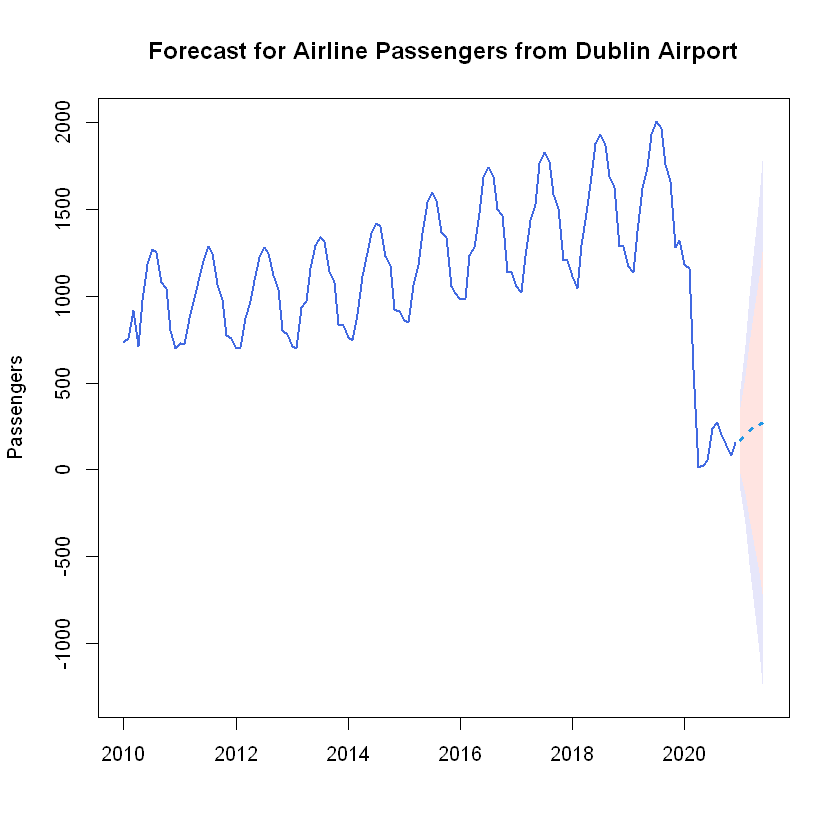

In [75]:
# 예측결과 그래프로 그리기
plot(holt.ets.pred, col="royalblue", lwd=2,
     flty=3, flwd=3, # 예측선의 유형과 두께를 지정
     shadecols=c("lavender", "mistyrose"), # 80과 95% 신뢰구간의 색상
     xalb="Year", ylab="Passengers",
     main="Forecast for Airline Passengers from Dublin Airport")

## Holt-Winters 지수 평활법
- level, trend(slope), season으로 설명되는 시계열 데이터를 예측.
- level, 불규칙적인 오차, trend, seasonal 성분에 의해 관측값이 결정된다.
- t+1 시점에서의 예측값은 과거 모든 관측값의 가중평균에 의해 계산된다.(level, slope, seasonal 세 개의 가중치 필요)
- alpha, beta, gamma는 level, slope, seasonal 세 개의 가중치의 영향력이 미치는 범위를 통제하며 큰 값일수록 최근의 관측값에 더 큰 가중치를 부여한다.

흠... 이게 가장 좋을지도 모르겠네... 한 번 확인 해보자!!!

In [76]:
# plot(departure2, col="royalblue", lwd=2,
#     xalb="Year", ylab="Air Passengers)",
#     main="Air Passengers")
# # 시계열의 변동성이 관측값의 크기에 비례하여 증폭하지 않는 것을 볼 수 있다 >> 가법 모델로서 분석될 수 있다는 뜻.
# # 홀트-윈터스 지수 평활법은 시계열 데이터의 구성성분이 가법적으로 결합되는 것을 가정한다.
# # 그러므로 로그를 취하여 가법 모델로 변환하는 것은 필요 없다.
# # 하지만 비교는 해보자~!

### 모델 생성

In [77]:
hw.ets <- ets(departure, model = "AAA") # AAA: 불규칙 성분, Trend, Seasonal 모두가 가법적이다.
hw.ets

ETS(A,Ad,A) 

Call:
 ets(y = departure, model = "AAA") 

  Smoothing parameters:
    alpha = 0.9999 
    beta  = 0.1413 
    gamma = 1e-04 
    phi   = 0.8 

  Initial states:
    l = 962.4632 
    b = 4.7834 
    s = -208.2974 -202.7917 72.2755 130.9762 307.6094 349.7194
           233.3971 73.3278 -65.9956 -144.2698 -278.4757 -267.4752

  sigma:  107.7625

     AIC     AICc      BIC 
1897.832 1903.886 1949.723 

### 예측값 추정

In [78]:
# 향후 1년간 승객수 예측
hw.ets.pred <- forecast(hw.ets, h=6) # 월별 데이터이므로 1년은 h=12이다.
hw.ets.pred

         Point Forecast     Lo 80     Hi 80      Lo 95     Hi 95
Jan 2021       120.1400 -17.96313  258.2432  -91.07053  331.3506
Feb 2021       127.7165 -78.91624  334.3493 -188.30103  443.7341
Mar 2021       276.7834  11.60873  541.9580 -128.76624  682.3329
Apr 2021       366.9147  48.54473  685.2846 -119.99014  853.8195
May 2021       515.7952 147.98794  883.6024  -46.71744 1078.3078
Jun 2021       683.4642 269.21589 1097.7125   49.92609 1317.0023

Warning message in plot.window(xlim, ylim, log, ...):
""xalb" is not a graphical parameter"
Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
""xalb" is not a graphical parameter"
Warning message in axis(1, ...):
""xalb" is not a graphical parameter"
Warning message in axis(2, ...):
""xalb" is not a graphical parameter"
Warning message in box(...):
""xalb" is not a graphical parameter"


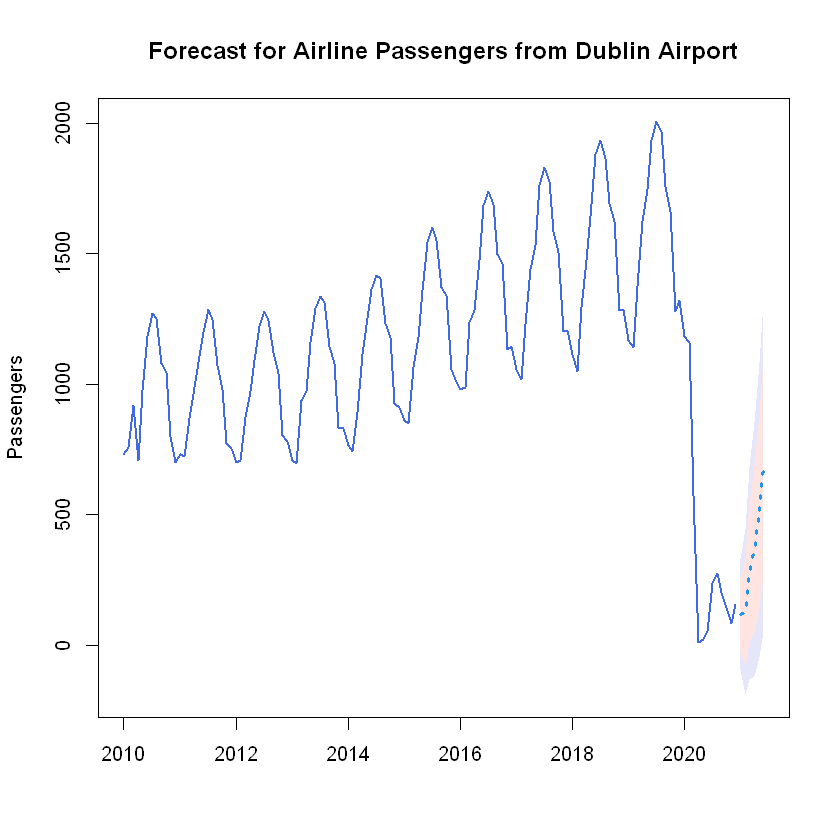

In [79]:
plot(hw.ets.pred, col="royalblue", lwd=2,
     flty=3, flwd=3, # 예측선의 유형과 두께를 지정
     shadecols=c("lavender", "mistyrose"), # 80과 95% 신뢰구간의 색상
     xalb="Year", ylab="Passengers",
     main="Forecast for Airline Passengers from Dublin Airport")

### 로그 씌워보자(취소)

In [80]:
# hw.ets2 <- ets(log.passenger, model = "AAA") # AAA: 불규칙 성분, Trend, Seasonal 모두가 가법적이다.
# hw.ets2.pred <- forecast(hw.ets2, h=12) # 월별 데이터이므로 1년은 h=12이다.
# plot(hw.ets2.pred, col="salmon", lwd=2,
#      fcol="indianred1", flwd=3, # 예측선의 색 지정, 선 굵기
#     xalb="Year", ylab="Air Passengers",
#     main="Forecast for Air Passengers")

In [81]:
# air.mean <- exp(hw.ets2.pred$mean)
# air.lower <- exp(hw.ets2.pred$lower)
# air.upper <- exp(hw.ets2.pred$upper)
# air.pred <- cbind(air.mean, air.lower, air.upper)
# air.pred

In [82]:
# # merge time series
# merged_ts <- ts(c(departure2, air.mean),               
#    start = start(departure2),
#    frequency = frequency(departure2))
  
# # print merged time series
# merged_ts

In [83]:
# plot(merged_ts, col="salmon", lwd=2,
#      fcol="indianred1", flwd=3, # 예측선의 색 지정, 선 굵기
#     xalb="Year", ylab="Air Passengers",
#     main="Forecast for Air Passengers")
# # 흠... exponent 하니까 예측의 변동 폭이 더 크다. 안좋은거겠지...??
# # 하긴, 애초에 log가 필요 없긴 했으니까...

## 최적 모델 자동 탐색

### 모델 생성

In [84]:
# 여러 대안을 비교한 후, 가장 좋은 모델을 선택한다.
auto.ets <- ets(departure)
auto.ets
# 선택된 모델은 ETS(A,Ad,A)이다.
# 역시 holt-winter가 가장 적당하네.

ETS(A,Ad,A) 

Call:
 ets(y = departure) 

  Smoothing parameters:
    alpha = 0.9999 
    beta  = 0.1413 
    gamma = 1e-04 
    phi   = 0.8 

  Initial states:
    l = 962.4632 
    b = 4.7834 
    s = -208.2974 -202.7917 72.2755 130.9762 307.6094 349.7194
           233.3971 73.3278 -65.9956 -144.2698 -278.4757 -267.4752

  sigma:  107.7625

     AIC     AICc      BIC 
1897.832 1903.886 1949.723 

###  향후 3년간 예측

Warning message in plot.window(xlim, ylim, log, ...):
""xalb" is not a graphical parameter"
Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
""xalb" is not a graphical parameter"
Warning message in axis(1, ...):
""xalb" is not a graphical parameter"
Warning message in axis(2, ...):
""xalb" is not a graphical parameter"
Warning message in box(...):
""xalb" is not a graphical parameter"


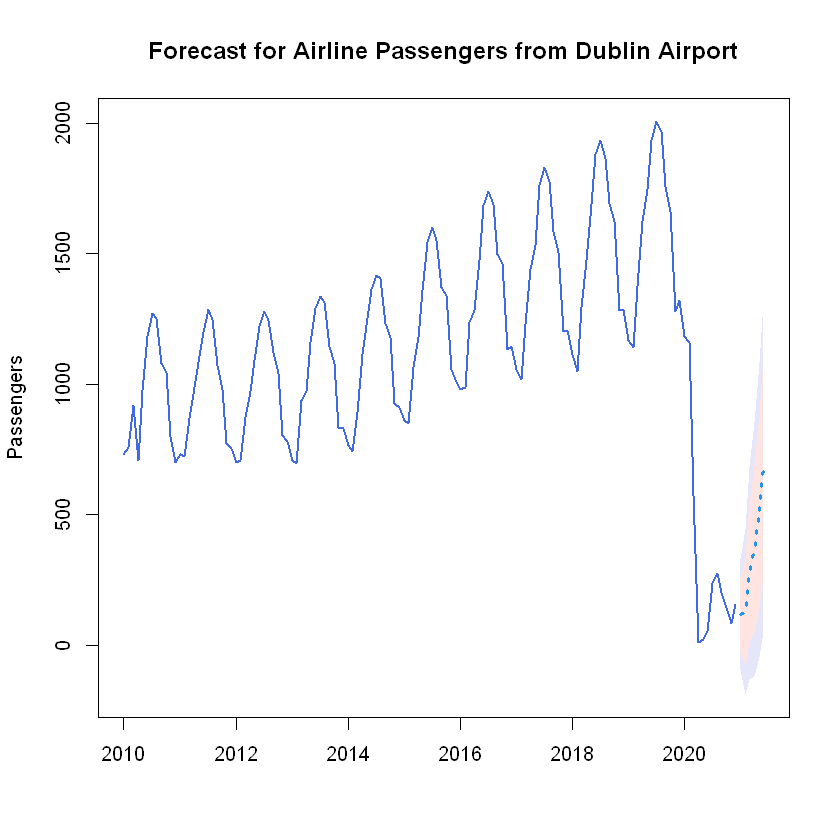

In [85]:
plot(forecast(auto.ets, h=6), col="royalblue", lwd=2,
     flty=3, flwd=3, # 예측선의 유형과 두께를 지정
     shadecols=c("lavender", "mistyrose"), # 80과 95% 신뢰구간의 색상
     xalb="Year", ylab="Passengers",
     main="Forecast for Airline Passengers from Dublin Airport")

In [127]:
# df$departures..000[148:153]
# forecast.arima$mean[1:6]
a <- forecast(auto.ets, h=6)

diff_table <- data.frame(actual= df$departures..000[133:138], predicted=a$mean[1:6])
mape <- mean(abs(diff_table$actual - diff_table$predicted) / diff_table$actual)
accuracy <- (1-mape)*100
accuracy

accuracy(a)

[1] -214.0082

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-2.425368,100.5841,52.8242,-30.07175,41.14341,0.2738436,0.2759947


# ARIMA
- Staionarity
1. ARIMA 예측 모델(Autoregressive integrated moving average forecasting model)은 시계열 데이터의 Staionarity을 가정.
2. Staionarity이란 시계열 데이터의 특성이 시간의 흐름에 따라 변하지 않는다는 것을 의미
3. Staionary time series는 장기적으로 예측 가능한 패턴을 갖지 않으며, 시계열 그래프는 일정한 변동폭(일정한 분산)을 가지면서 대체로 수평에 가까운 패턴(일정한 평균)을 보인다.
4. 데이터가 Staionarity를 가진다는 것은 평균과 분산이 안정화 되어 있어서 분석하기 쉽다는 것을 의미.
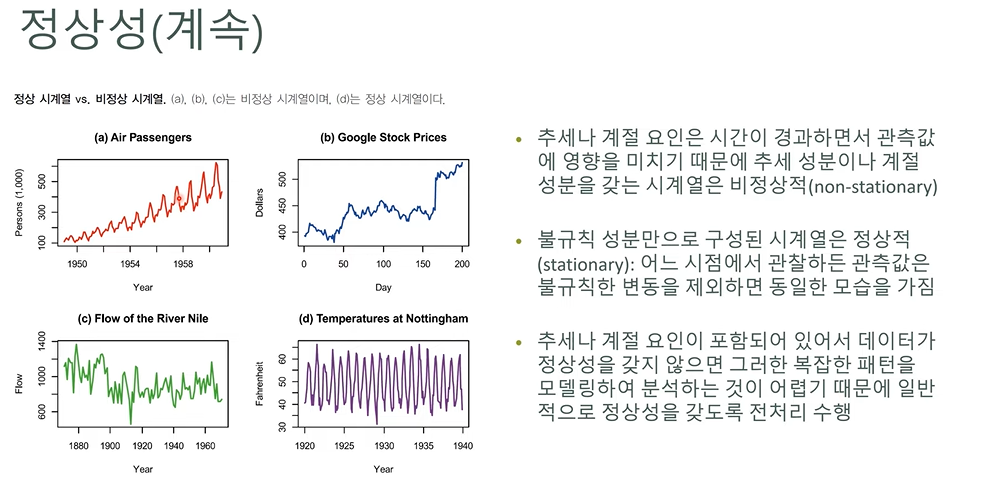
(a): 비정상성(non-stationary), 시간의 흐름에 따라 증가하는 추세를 보이고 일정한 주기를 갖는 계절적 등락도 보인다.<br>
(b): 비정상성(non-stationary), 뚜렷한 증가 패턴이 관찰 된다.<br>
(c): 비정상성(non-stationary), 수준의 변화가 관찰된다.<br>
(d): 정상성(stationary), 불규칙 성분만으로 구성된 시계열은 stationary하다. 어느 시점에서 관찰하든 관측값은 불규칙한 변동을 제외하면 동일한 모습을 가지기 때문.

- 자기 상관
- differences 적용한 시계열 데이터
- 자기 상관 함수
- 편자기 상관함수
- ACF 도표와 PACF 도표 > 정상성 평가
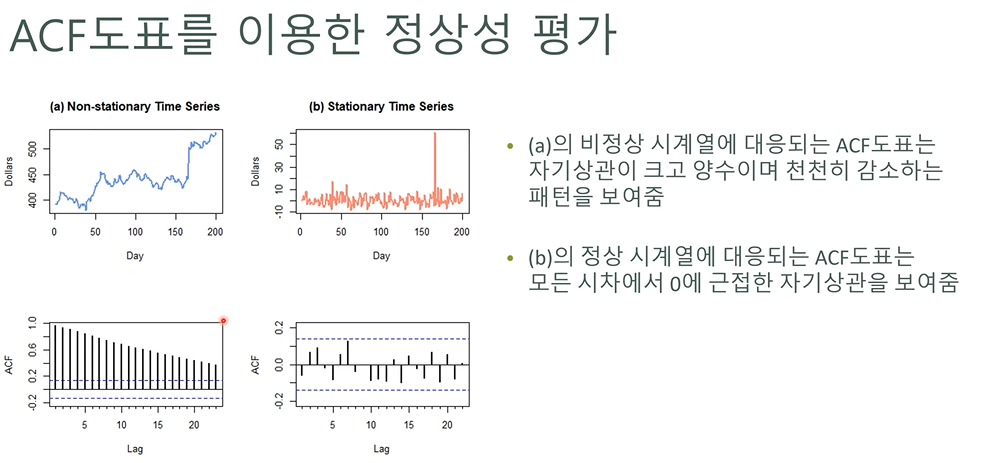

- 정상 시계열로 변환
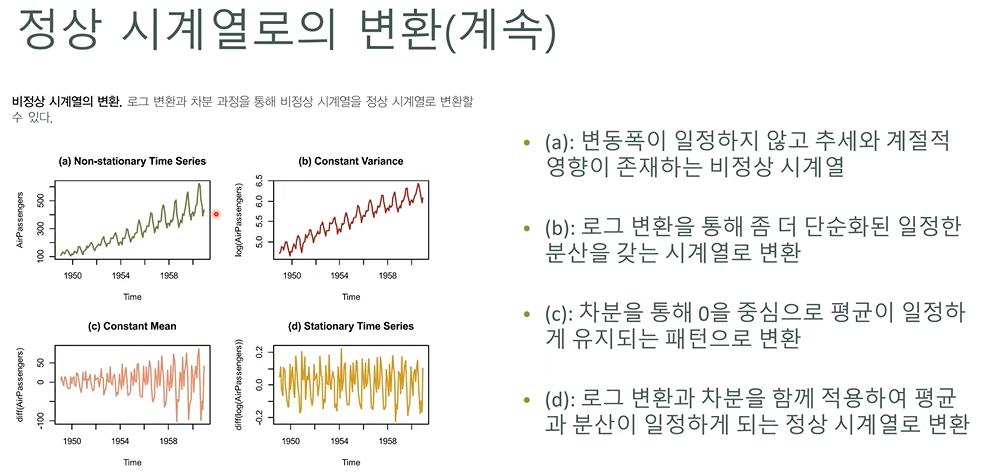

## 그래프 확인

In [87]:
# plot(departure2, col="cornflowerblue", lwd=2,
#       xlab="Day", ylab="Dollars",
#       main="Air passengers")
# # 명백한 추세가 관찰되므로, non-stationary 시계열이다.

## ACF 도표 > 정상성 평가

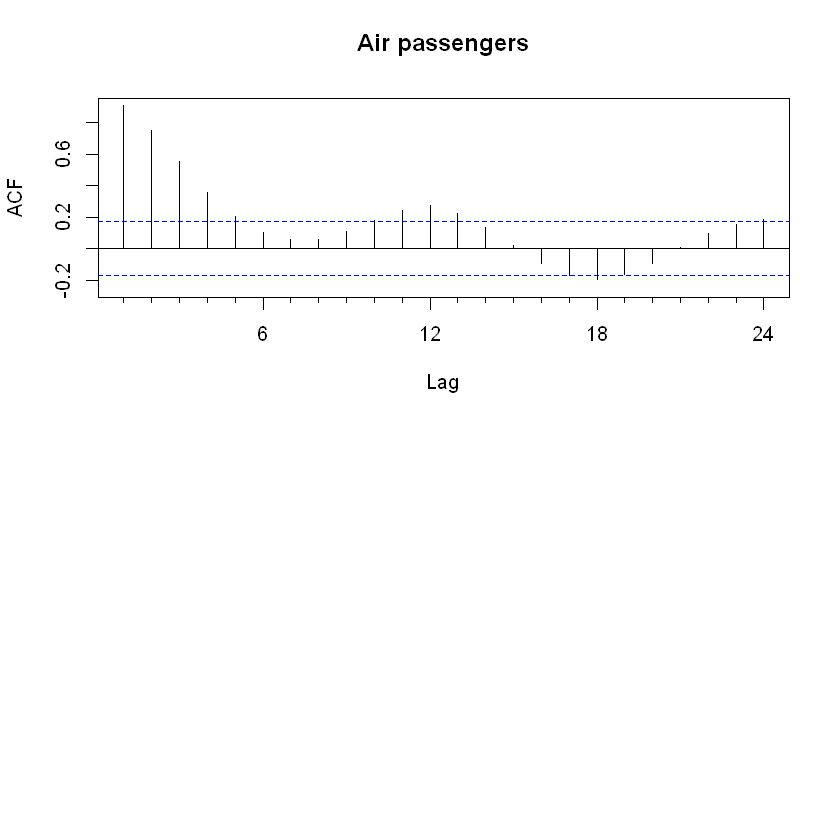

In [88]:
par(mfrow = c(2, 1))
# library(forecast)
Acf(departure, main="Air passengers")
# 시계열 데이터가 non-stationary라는 것을 보여준다, 왜냐하면 자기상관이 크고 양수이며 천천히 감소하고 있기 때문.
# 그래프 속 파란 점선은 95% 신뢰구간을 의미하는데, 많은 막대가 신뢰구간을 벗어나고 있다.
# 즉, 많은 차수에서 0이 아닌 유의미한 자기상관이 존재한다. == non-stationary 이다.

## 차분하여 정상 시계열로 변환
### 차분 횟수 결정(ndiffs())

In [89]:
ndiffs(departure)
# 1회 차분이 추천됨

[1] 1

### 그래도 차분 해보자! 차분 시계열 생성

In [90]:
diff.passenger <- diff(departure, lag = 1, differences = 1) # diff() 함수는 기본적으로 1회 차분
head(diff.passenger)
# 24.8은 departure의 첫번째 관측값과 두번째 관측값의 차이에 의해 발생한다.
#      392.830017         | 392.512085           | 397.305908            | 398.011322 | 400.490204           | 408.095734
# -0.317931999999985 | 4.79382299999997 | 0.705414000000019 | 2.478882     | 7.60552999999999 | 8.49475100000001

,Feb,Mar,Apr,May,Jun,Jul
2010,24.8,162.4,-210.1,268.4,205.2,86.4


In [91]:
# df2 <- ts(df$departures..000)
# ndiffs(df2)
# Acf(df2, main="Air passengers")

In [92]:
# diff.passenger <- diff(df2, differences = 2) # diff() 함수는 기본적으로 1회 차분
# head(diff.passenger)
# # 24.8은 df2의 첫번째 관측값과 두번째 관측값의 차이에 의해 발생한다.

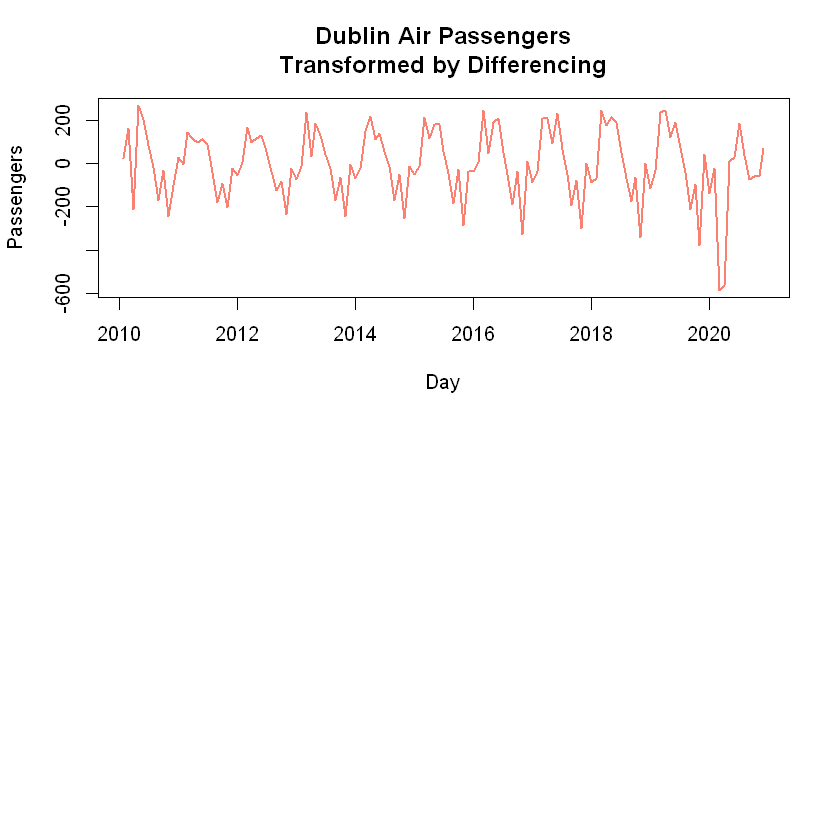

In [93]:
par(mfrow = c(2, 1))
plot(diff.passenger, col="salmon", lwd=2,
    xlab="Day", ylab="Passengers",
    main="Dublin Air Passengers\nTransformed by Differencing")
# 추세가 사라지고, 전체기간에 걸쳐 대체로 일정한 평균을 갖는 정상 시계열로 변환 됨 

### 정상 시계열에 대응되는 acf 도표 그리기

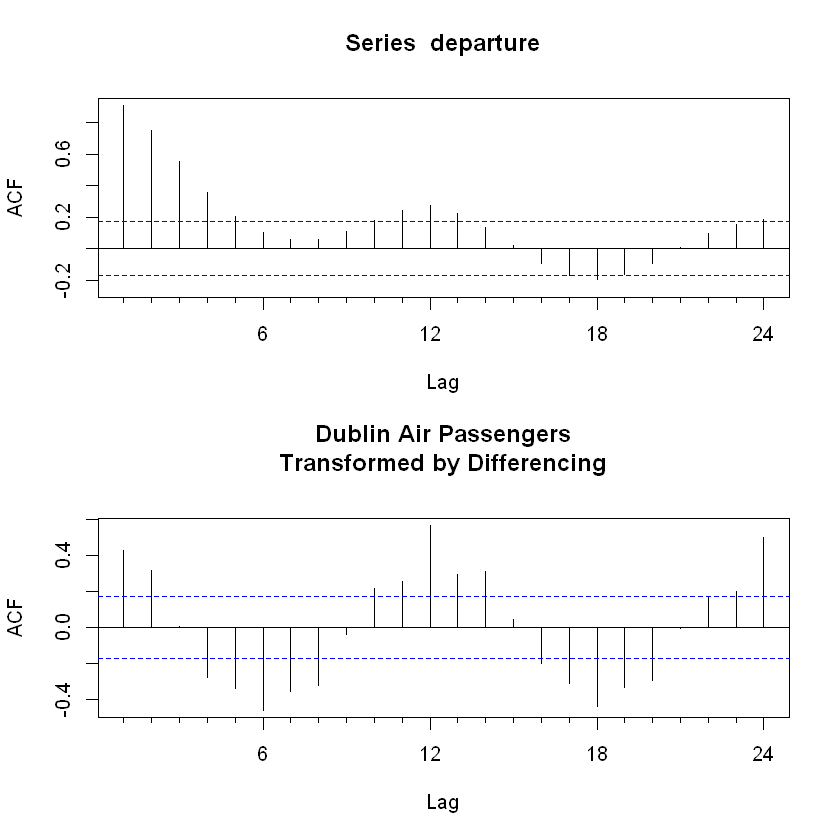

In [94]:
par(mfrow = c(2, 1))
Acf(departure)
Acf(diff.passenger, main="Dublin Air Passengers\nTransformed by Differencing")
# 정상성이 이전보다는 충족되었다는 것을 보여준다.
# 하지만 많은 시차에서 95% 신뢰구간을 벗어나는 자기상관이 존재하며, 
# 이는 자기상관이 통계적으로 유의하게 0이라는 것을 나타내지 못한다.
# 즉, 자기 상관이 있는 비정상(non-stationary) 시계열이지 않을까...? 좀 더 공부 해보자.
# 오잉...?? 근데 아래 test에서는 stationary이라고 결과가 나왔다!!!

### 검정을 통한 정상성 평가(adf 검정)
- H0: 시계열 데이터가 non-stationary 이다.
- HA: 시계열 데이터가 non-stationary가 아니다.

즉, P-value의 값이 0.05 or 0.01 미만이면 주어진 데이터는 정상(stationary) 시계열이다.

In [95]:
library(tseries)
adf.test(df$departures..000) # p-value = 0.4725 >> 유의하지 않음: 비정상(non-stationary)
adf.test(departure) # p-value = 0.7658 >> 유의하지 않음: 비정상(non-stationary)
adf.test(diff.passenger) # p-value = 0.01 >> 유의함: 정상(stationary) 

Warning message:
"package 'tseries' was built under R version 4.2.2"



	Augmented Dickey-Fuller Test

data:  df$departures..000
Dickey-Fuller = -2.2493, Lag order = 5, p-value = 0.4725
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  departure
Dickey-Fuller = -1.5447, Lag order = 5, p-value = 0.7658
alternative hypothesis: stationary


Warning message in adf.test(diff.passenger):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  diff.passenger
Dickey-Fuller = -7.2297, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary


# ARMA
- AR: 시계열 상의 과거 관측값을 이용하여 예측 모델 생성. <br>예측하고자 하는 특정 변수의 과거 관측값의 선형 결합으로 해당 변수의 미래 값 예측
- MA: 과거 예측 오차를 기반으로 예측 모델 구축. <br>예측 오차를 이용하여 미래의 값 예측.

## Stationarity 평가

Warning message in plot.window(xlim, ylim, log, ...):
""xalb" is not a graphical parameter"
Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
""xalb" is not a graphical parameter"
Warning message in axis(1, ...):
""xalb" is not a graphical parameter"
Warning message in axis(2, ...):
""xalb" is not a graphical parameter"
Warning message in box(...):
""xalb" is not a graphical parameter"


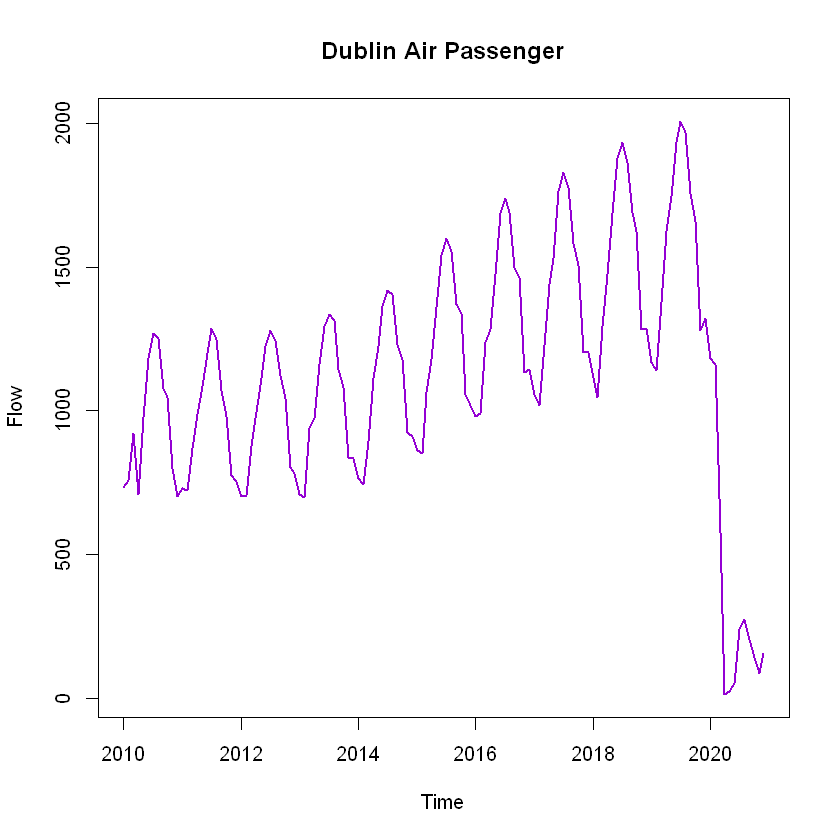

In [96]:
plot(departure, col="darkviolet", lwd = 2,
      xalb="Year", ylab="Flow",
      main="Dublin Air Passenger")
# 분산은 전 기간에 걸쳐 변동폭이 크지 않은 것처럼 보임(2020, 2021 데이터는 예외)
# 로그 변환과 같은 데이터 변환 과정은 불필요.
# 하지만 약간의 상승 추세는 관찰 됨.
# adf 검정을 통해 정상성을 통계적으로 평가가 필요

### 정상성 평가

In [97]:
library(tseries)
adf.test(departure)
# p-value = 0.7658 >> 통계적으로 유의하지 않음 >> 정상성을 충족하지 못함.
# 차분 과정을 통해 정상 시계열로 변환해보자.


	Augmented Dickey-Fuller Test

data:  departure
Dickey-Fuller = -1.5447, Lag order = 5, p-value = 0.7658
alternative hypothesis: stationary


In [98]:
# 몇 회 차분이 필요한지 알아보기
library(forecast)
ndiffs(departure)
# 1회가 추천

[1] 1

In [99]:
diff.passenger1 <- diff(departure, lag = 1, differences = 1) # diff() 함수는 기본적으로 1회 차분
head(diff.passenger1)

,Feb,Mar,Apr,May,Jun,Jul
2010,24.8,162.4,-210.1,268.4,205.2,86.4


In [100]:
# adf test를 통해 다시 정상성을 확인 해보기
adf.test(diff.passenger1)
# p-value = 0.01 >> 유의하다 >> 정상(stationary)적이다.

Warning message in adf.test(diff.passenger1):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  diff.passenger1
Dickey-Fuller = -7.2297, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary


## 예측 모델 생성
ARIMA p/d/q 모델은 p/d/q 값에 따라 다양한 대안 모델이 생성된다.
목표는 여러 대안 모델 중 최고 성능 모델을 고르는 p/d/q를 결정하는 것이다.
위에서 이미 차분을 해보았기 때문에, 2회 차분이 적당하다는 것은 이미 알고 있다.
그리고 일반적으로 p와 q는 acf 도표와 pacf도표를 바탕으로 결정한다.
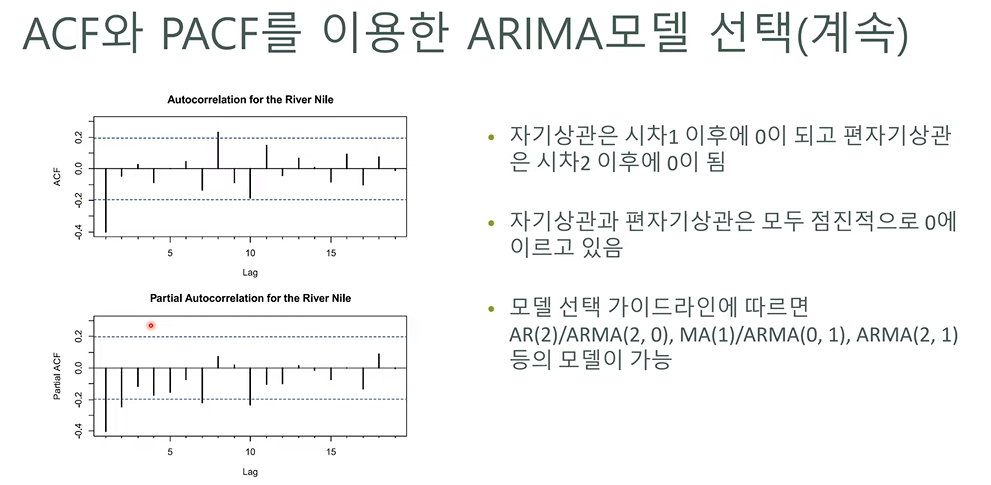

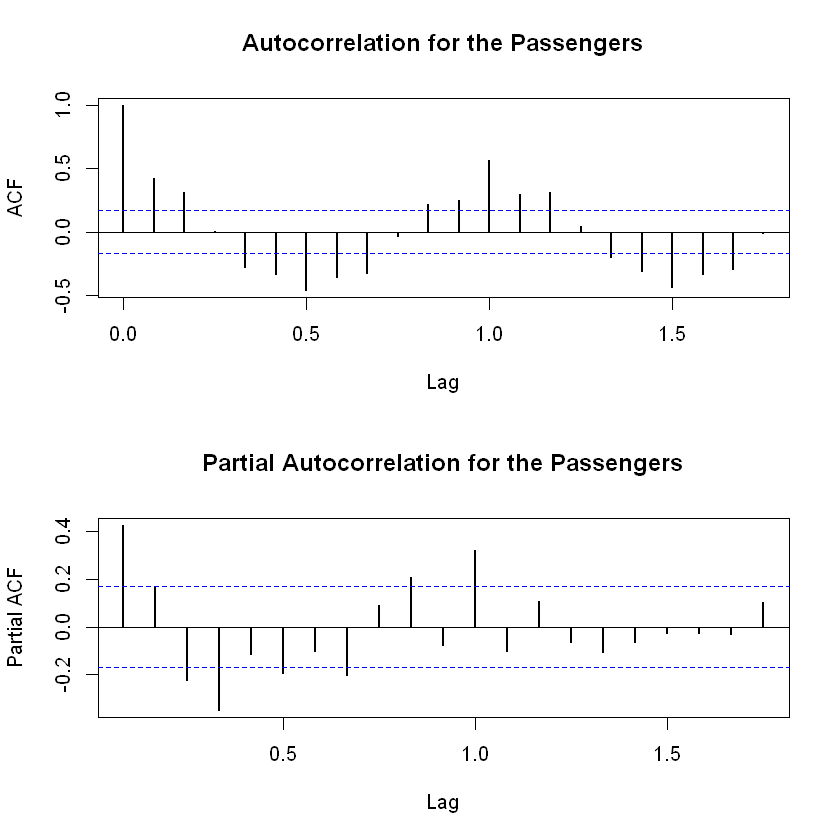

In [101]:
# library(forecast)
par(mfrow = c(2, 1))
acf(diff.passenger1, lwd=2,
     main="Autocorrelation for the Passengers")
pacf(diff.passenger1, lwd=2,
      main="Partial Autocorrelation for the Passengers")

In [102]:
# diff.passenger로 확인해도 arima 모델에는 df2을 넣네?
#여기서는MA(1) 모델==ARMA(0, 1)을 사용했기 때문 >> 1개의 계수(ma1)만 추정된다.
passenger.arima <- arima(departure, order=c(0, 1, 1))# 순서는 order=c(p, d, q)
passenger.arima


Call:
arima(x = departure, order = c(0, 1, 1))

Coefficients:
         ma1
      0.2955
s.e.  0.0686

sigma^2 estimated as 22314:  log likelihood = -841.78,  aic = 1687.55

### 성능 확인

In [103]:
accuracy(passenger.arima) # 작을수록 예측 정확도가 좋다는 것을 의미

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-3.224087,148.8106,111.0712,-20.08071,38.33714,0.9121716,0.08966747


## 모델 평가와 예측
- 예측 모델이 적절하다면 잔차(예측 오차)는 평균 0의 정규분포를 따라야 한다.
- 모든 가능한 시차에 한해 자기 상관은 0이어야 한다 == 서로 독립이어야 한다 == 잔차 간 상관관계는 존재하지 않아야 한다.

### 정규 분포 Q-Q plot

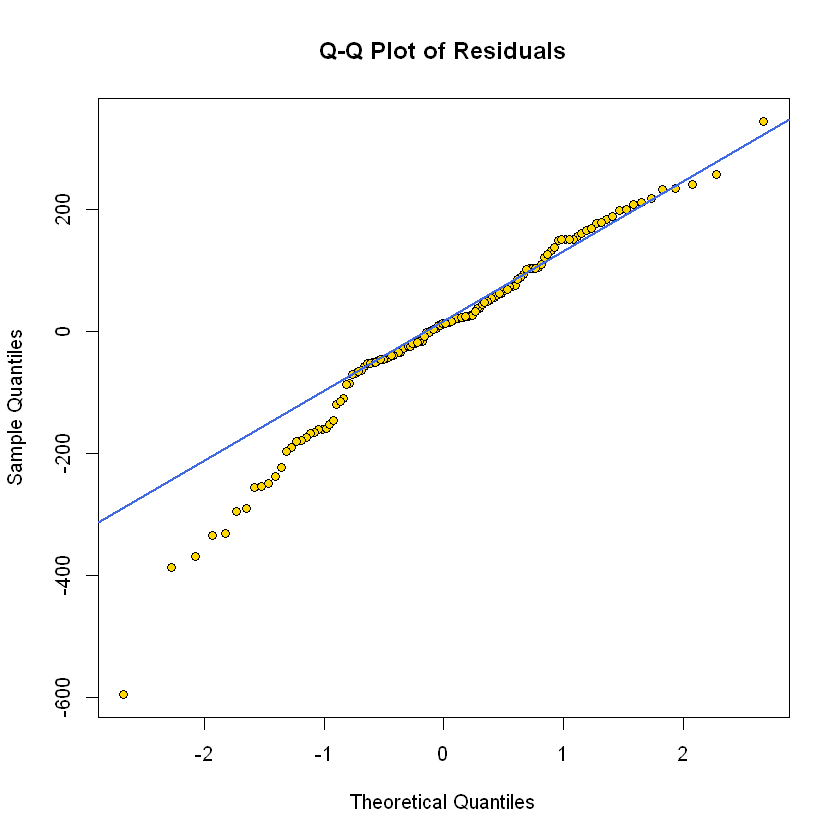

In [104]:
# 잔차가 정규분포를 따르는지 확인
qqnorm(passenger.arima$residuals, pch=21, col="black",
      bg="gold", main="Q-Q Plot of Residuals")
qqline(passenger.arima$residuals, col="royalblue", lwd=2)

### 자기상관 귀무가설
- H0: 자기상관이 0
- HA: 자기상관이 0

In [105]:
Box.test(passenger.arima$residuals, type = "Ljung-Box")
# p-value = 0.2974 >> 통계적으로 유의하지 않다.
# 잔차들의 상관관계가 0이라는 귀무가설을 기각하지 못한다.
# 잔차들의 자기 상관이 0과 다르다고 할 수 없다.
# 즉, 이 예측 모델은 시계열 데이터를 잘 적합 시킨것으로 볼 수 있다. 


	Box-Ljung test

data:  passenger.arima$residuals
X-squared = 1.0856, df = 1, p-value = 0.2974


### 예측

In [106]:
passenger.arima.pre <- forecast(passenger.arima, h=6) # 향후 6개월 예측
passenger.arima.pre

         Point Forecast      Lo 80    Hi 80     Lo 95     Hi 95
Jan 2021       181.1632  -10.27178 372.5982 -111.6114  473.9378
Feb 2021       181.1632 -132.13599 494.4624 -297.9866  660.3130
Mar 2021       181.1632 -218.41835 580.7448 -429.9441  792.2705
Apr 2021       181.1632 -289.12867 651.4551 -538.0862  900.4126
May 2021       181.1632 -350.51667 712.8431 -631.9710  994.2974
Jun 2021       181.1632 -405.51602 767.8425 -716.0853 1078.4117

Warning message in plot.window(xlim, ylim, log, ...):
""xalb" is not a graphical parameter"
Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
""xalb" is not a graphical parameter"
Warning message in axis(1, ...):
""xalb" is not a graphical parameter"
Warning message in axis(2, ...):
""xalb" is not a graphical parameter"
Warning message in box(...):
""xalb" is not a graphical parameter"


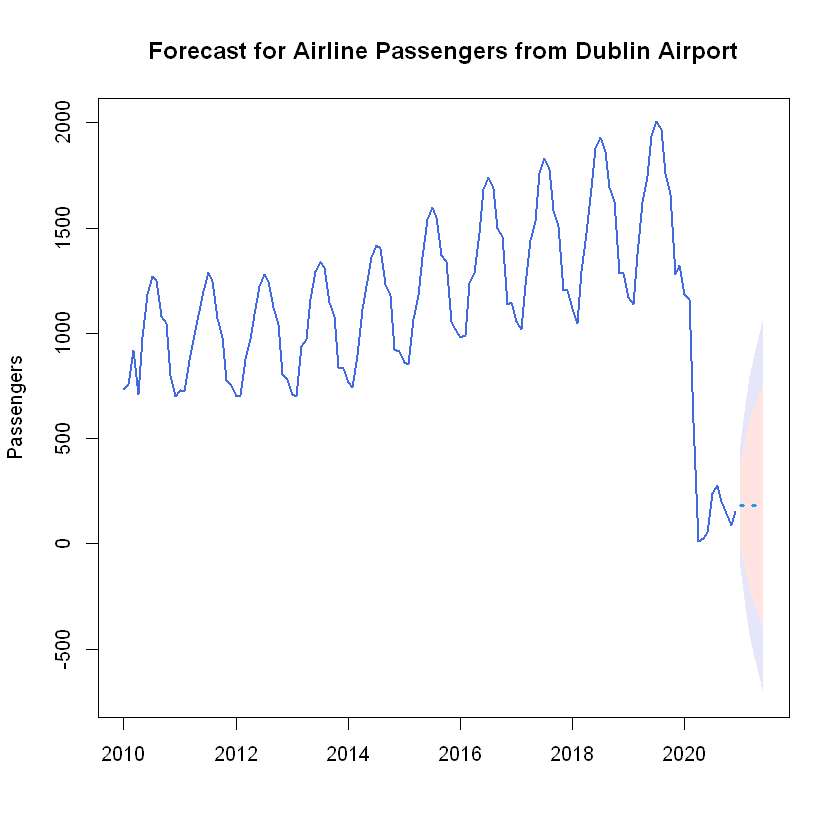

In [107]:
plot(passenger.arima.pre, col="royalblue", lwd=2,
     flty=3, flwd=3, # 예측선의 유형과 두께를 지정
     shadecols=c("lavender", "mistyrose"), # 80과 95% 신뢰구간의 색상
     xalb="Year", ylab="Passengers",
     main="Forecast for Airline Passengers from Dublin Airport")

## SARIMA - 최적 모델 자동 탐색

In [108]:
# 모델 자동 생성
departure.arima <- auto.arima(departure)

In [109]:
departure.arima
# 계절성을 고려한 arima 모델은 이렇게 ARIMA(2,0,0)(2,1,0)[12] 숫자 세개의 셋트로 보여진다.
# (1,1,0) 이게 계절 부분
# (0,1,1) 비계절 부분의 p/d/q에 대응되는 parameter
# [12] 연간 관측값의 개수

# ar1(비계절) ar2(비계절) ma1(비계절) sma1(계절)로 4개의 계수가 추정 되었다.

Series: departure 
ARIMA(1,1,0)(0,1,1)[12] 

Coefficients:
         ar1     sma1
      0.3966  -0.8274
s.e.  0.0837   0.2046

sigma^2 = 11307:  log likelihood = -730.08
AIC=1466.16   AICc=1466.37   BIC=1474.5

In [110]:
# 직접 만들어줄수도 있고, 위와 동일하게 나온다.
arima(departure, order = c(0, 1, 1) , seasonal = list(order=c(1, 1, 0), period=12))


Call:
arima(x = departure, order = c(0, 1, 1), seasonal = list(order = c(1, 1, 0), 
    period = 12))

Coefficients:
         ma1    sar1
      0.3519  -0.454
s.e.  0.0807   0.148

sigma^2 estimated as 13019:  log likelihood = -734.02,  aic = 1474.04

In [129]:
df$departures..000[133:138]

[1] 104.1  46.7  57.5  61.5  82.4 174.7

In [111]:
forecast.arima <- forecast(departure.arima, h=6)
forecast.arima

         Point Forecast      Lo 80    Hi 80     Lo 95     Hi 95
Jan 2021      104.45102  -32.29760 241.1996 -104.6879  313.5900
Feb 2021       94.42005 -140.31922 329.1593 -264.5827  453.4228
Mar 2021      168.66260 -147.82510 485.1503 -315.3636  652.6888
Apr 2021      181.99907 -203.89695 567.8951 -408.1780  772.1761
May 2021      312.76658 -133.51837 759.0515 -369.7673  995.3005
Jun 2021      466.67672  -33.35045 966.7039 -298.0488 1231.4023

Warning message in plot.window(xlim, ylim, log, ...):
""xalb" is not a graphical parameter"
Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
""xalb" is not a graphical parameter"
Warning message in axis(1, ...):
""xalb" is not a graphical parameter"
Warning message in axis(2, ...):
""xalb" is not a graphical parameter"
Warning message in box(...):
""xalb" is not a graphical parameter"


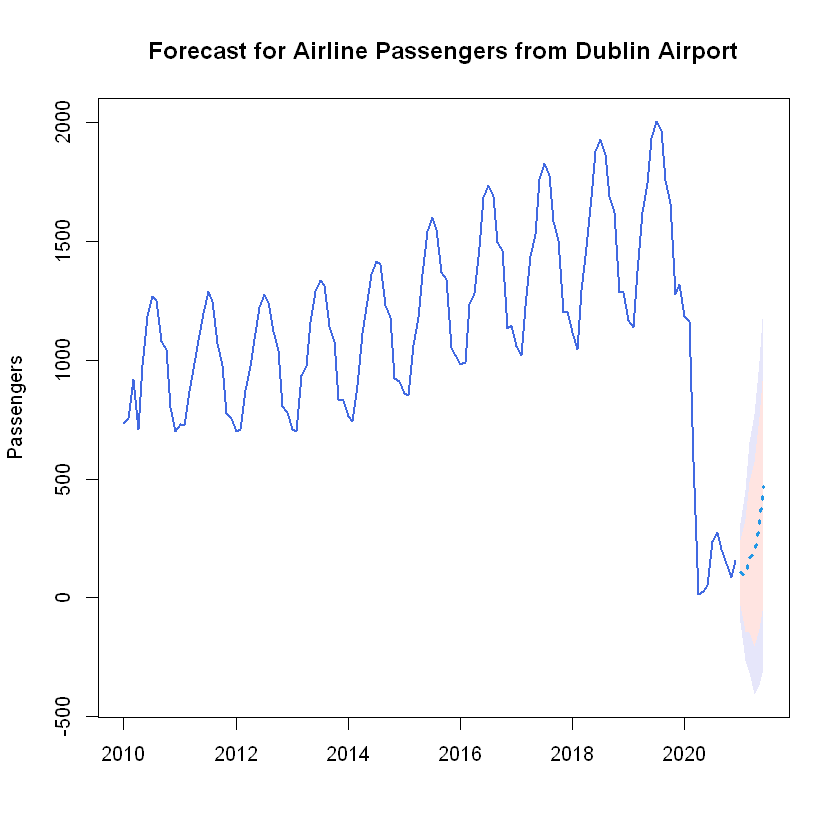

In [112]:
# plot(forecast(departure.arima, h=6), col="darkorange", lwd=2,
#       flty=1, flwd=3,
#       fcol="orangered", # 오렌지 실선이 향후 5년 예측 값
#       shadecols=c("lavender", "skyblue"), # 신뢰 구간
#       xlab="Year", ylab="Monthly Production",
#       main="Forecast for Austrailia Monthly Gas Production")

plot(forecast.arima, col="royalblue", lwd=2,
     flty=3, flwd=3, # 예측선의 유형과 두께를 지정
     shadecols=c("lavender", "mistyrose"), # 80과 95% 신뢰구간의 색상
     xalb="Year", ylab="Passengers",
     main="Forecast for Airline Passengers from Dublin Airport")

In [132]:
# df$departures..000[148:153]
# forecast.arima$mean[1:6]

diff_table <- data.frame(actual= df$departures..000[133:138], predicted=forecast.arima$mean[1:6])
mape <- mean(abs(diff_table$actual - diff_table$predicted) / diff_table$actual)
accuracy <- (1-mape)*100
accuracy

accuracy(forecast.arima)

[1] -56.41377

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-4.243693,100.1111,50.25274,-18.05207,35.48415,0.260513,-0.002229607


In [ ]:
decomposition > -252.61%
ets > -214%
arima > -56.41%

In [114]:
ADF테스트의 귀무가설은 사실 '시계열 데이터에 unit root가 존재한다'입니다. unit root는 non-stationary의 한 원인입니다(unit root가 무엇인지도 궁금하실텐데요, 이 부분은 쉽게 설명이 어려운 부분이라 그냥 넘어가겠습니다). 따라서 unit root가 존재한다는 귀무가설을 채택하면(기각하지 못하면) non-stationary로 간주하게 되는 겁니다. ADF테스트의 대립가설은 귀무가설의 반대로서 stationary를 얘기할 뿐만 아니라 trend stationary라는 것도 포함합니다. 따라서 AirPassengers 데이터와 같이 명백히 계절적 추세적 트렌드를 가지고 있을 경우 귀무가설을 기각하는 것이 stationary가 아닌 trend stationary를 의미할 수도 있습니다. 다음과 같이 원래의 데이터와 차분한 데이터에 대해 ADF테스트를 해보면 모두 귀무가설을 기각하는 결과가 나오는 것을 볼 수 있습니다. 그래서 ADF테스트로는 귀무가설을 기각할 경우 우리가 얘기하는 정상성을 정확히 테스트하기 어려운 경우도 생길 수 있습니다. 

> adf.test(AirPassengers)

 Augmented Dickey-Fuller Test

data:  AirPassengers
Dickey-Fuller = -7.3186, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary

> adf.test(diff(AirPassengers))

 Augmented Dickey-Fuller Test

data:  diff(AirPassengers)
Dickey-Fuller = -7.0177, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary

이럴 때 다음과 같이 KPSS테스트를 이용하는 것이 좋은 대안이 될 수 있습니다. KPSS테스트는 ADF테스트와 반대로 귀무가설이 "stationary 시계열이다"입니다. 아래의 결과를 보면 원래의 데이터는 귀무가설을 기각하여 non-stationary 시계열이라고 판정하고 있고, 반면에 차분한 데이터는 귀무가설을 기각하지 못하여 stationary 시계열로 판정합니다.

> kpss.test(AirPassengers)

 KPSS Test for Level Stationarity

data:  AirPassengers
KPSS Level = 2.7395, Truncation lag parameter = 4, p-value = 0.01

> kpss.test(diff(AirPassengers))

 KPSS Test for Level Stationarity

data:  diff(AirPassengers)
KPSS Level = 0.014626, Truncation lag parameter = 4, p-value = 0.1

ERROR: Error in parse(text = x, srcfile = src): <text>:1:9: unexpected symbol
1: ADF테스트의 귀무가설은
            ^


In [134]:
# 시계열 데이터로 변환
dp <- ts(data=df[2], start = c(2010, 1), end = c(2021, 6),
               frequency=12) # 12는 monthly
dp <- ts(as.numeric(dp), start=c(2010,1), frequency = 12)

Warning message in plot.window(xlim, ylim, log, ...):
""xalb" is not a graphical parameter"
Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
""xalb" is not a graphical parameter"
Warning message in axis(1, ...):
""xalb" is not a graphical parameter"
Warning message in axis(2, ...):
""xalb" is not a graphical parameter"
Warning message in box(...):
""xalb" is not a graphical parameter"
Warning message in plot.window(xlim, ylim, log, ...):
""xalb" is not a graphical parameter"
Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
""xalb" is not a graphical parameter"
Warning message in axis(1, ...):
""xalb" is not a graphical parameter"
Warning message in axis(2, ...):
""xalb" is not a graphical parameter"
Warning message in box(...):
""xalb" is not a graphical parameter"
Warning message in plot.window(xlim, ylim, log, ...):
""xalb" is not a graphical parameter"
Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
""xalb" is not a gra

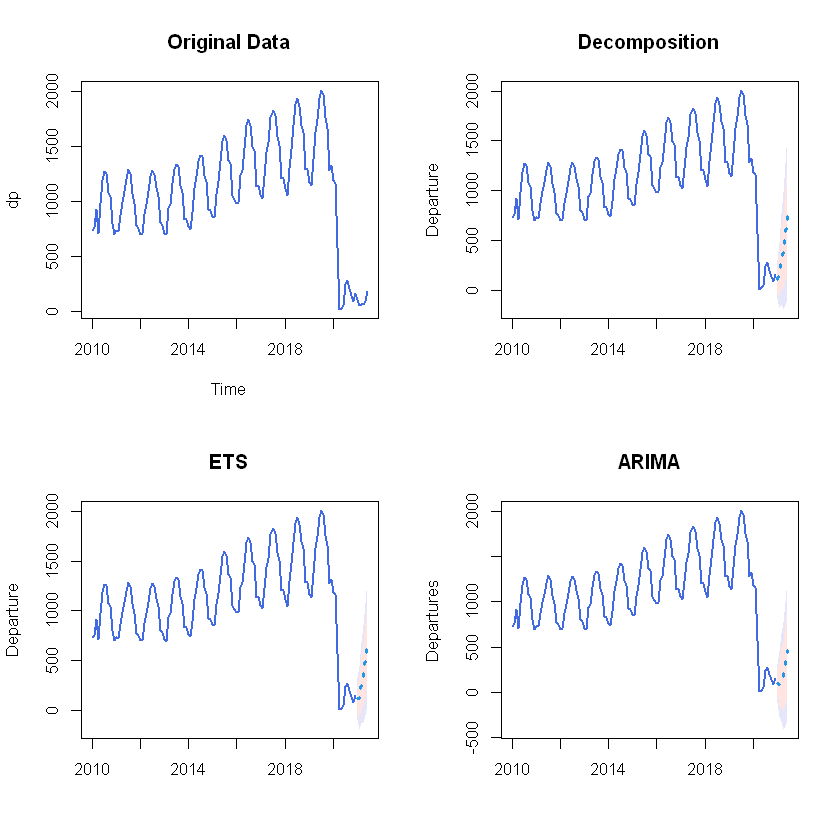

In [139]:
par(mfrow = c(2, 2))

plot(dp, lwd=2, col='royalblue', 
     main='Original Data')

plot(p, col="royalblue", lwd=2,
     flty=3, flwd=3, # 예측선의 유형과 두께를 지정
     shadecols=c("lavender", "mistyrose"), # 80과 95% 신뢰구간의 색상
     xalb="Year", ylab="Departure",
     main="Decomposition")

plot(forecast(auto.ets, h=6), col="royalblue", lwd=2,
     flty=3, flwd=3, # 예측선의 유형과 두께를 지정
     shadecols=c("lavender", "mistyrose"), # 80과 95% 신뢰구간의 색상
     xalb="Year", ylab="Departure",
     main="ETS")

plot(forecast.arima, col="royalblue", lwd=2,
     flty=3, flwd=3, # 예측선의 유형과 두께를 지정
     shadecols=c("lavender", "mistyrose"), # 80과 95% 신뢰구간의 색상
     xalb="Year", ylab="Departures",
     main="ARIMA")

# SARIMA(Seasonally Adjusted Data)

## ...Using Multiplicative Decomposition

In [ ]:
round(head(fit.mult$seasonal, 24),3)

In [ ]:
plot(departure, main='Seasonally Adjusted Passengers Data')
x <- as.vector(time(departure))
y <- departure/fit.mult$seasonal
lines(x, y, col='darkgreen', lw=3)

## ...Using STL

In [ ]:
head(fit.stl$time.series)
round(head(fit.stl$time.series[,'seasonal'],36),2)

In [ ]:
plot(departure, main='Seasonally Adjusted Pessengers Data')
x <- as.vector(time(departure))
y <- departure-fit.stl$time.series[,'seasonal']
lines(x, y, col='red', lw=3)

Seasonal adjusted data can be obtained by using the seasadj() method.

In [ ]:
plot(departure, main='Seasonally Adjusted Pessengers Data STL')
x <- as.vector(time(departure))
y <- seasadj(fit.stl)
lines(x, y, col='red', lw=3)

## ...Using X11

In [ ]:
plot(departure, main='Seasonally Adjusted Pessengers Data X11')
x <- as.vector(time(departure))
y <- seasadj(fit.X11Auto)
lines(x, y, col='blue', lw=3)